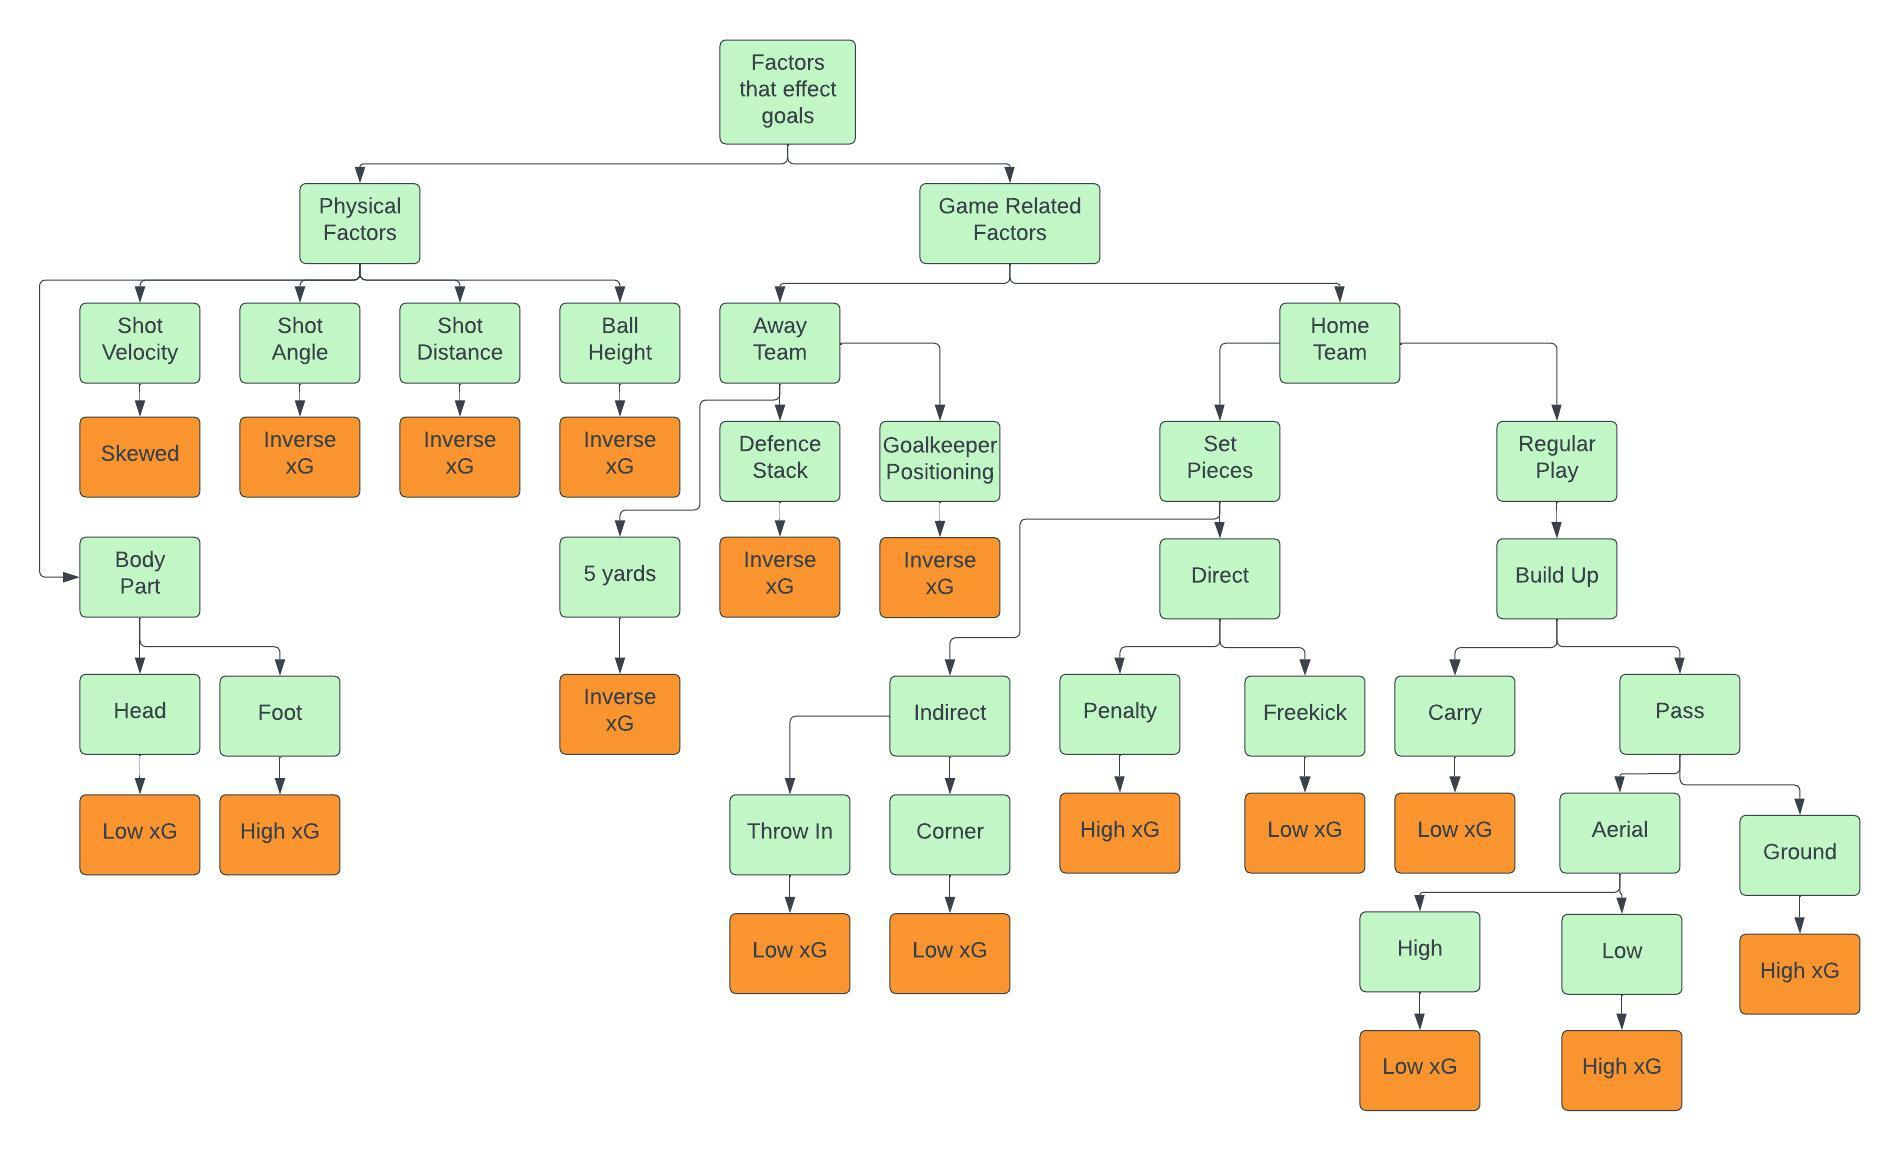

In [ ]:
!pip install import-ipynb
!pip install eli5
!pip install shap
!pip install lime
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing the tools to call google drive
from google.colab import drive


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import uniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, log_loss,roc_curve, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
import pickle as pkl

import eli5
import shap
import lime 
import yellowbrick
import import_ipynb

In [ ]:
# mount our directory
mount='/content/gdrive'
drive.mount(mount, force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Switch to the directory on the VM for our purposes
drive_root=mount + '/My Drive/Colab Notebooks/Thesis'
%cd $drive_root
%pwd

/content/gdrive/My Drive/Colab Notebooks/Thesis


'/content/gdrive/My Drive/Colab Notebooks/Thesis'

In [ ]:
import Pitch_Plot
import Half_Pitch
import data
from data import obtain_seasons,fetch_url,Game
from Pitch_Plot import pitchplot
from Half_Pitch import halfpitchplot

importing Jupyter notebook from Pitch_Plot.ipynb
importing Jupyter notebook from Half_Pitch.ipynb
importing Jupyter notebook from data.ipynb


In [ ]:
df = pd.read_pickle('./final_data.pkl')

In [ ]:
df.columns

Index(['shot id', 'play pattern', 'x location shot', 'y location shot',
       'duration', 'outcome', 'technique used', 'first time', 'x gk location',
       'y gk location', 'body part', 'type of shot',
       'Number of opponents in 5 yards', 'Players between goal', 'player name',
       'Team Name', 'official xg', 'Pass id', 'Pass Type', 'game_id',
       'season_id', 'distance_from_goalpost_a', 'distance_from_goalpost_b',
       'shot_angle'],
      dtype='object')

In [ ]:
df['shot distance'] = round(np.sqrt((df['x location shot']-120)**2+(df['y location shot']-40)**2),1)

In [ ]:
df['gk distance'] = round(np.sqrt((df['x gk location']-120)**2+(df['y gk location']-40)**2),1)
df

,shot id,play pattern,x location shot,y location shot,duration,outcome,technique used,first time,x gk location,y gk location,...,official xg,Pass id,Pass Type,game_id,season_id,distance_from_goalpost_a,distance_from_goalpost_b,shot_angle,shot distance,gk distance
0,56deeffa-ff55-429e-91df-41f237a3ebac,Regular Play,103.7,46.3,0.909600,Saved,Normal,True,116.0,43.0,...,0.174474,448cb3aa-ee0b-4829-a7d4-bdef6dfda5bd,Ground Pass,68311,2019,19.281597,16.461470,24.3,17.5,5.0
1,00d9c066-1078-4e1c-8c7f-2ca299e3a5f0,From Free Kick,107.4,37.4,1.033500,Goal,Normal,False,118.3,39.9,...,0.028797,f5d55ee4-2db3-4604-b9fa-8bd0645fdc4b,High Pass,68311,2019,12.677539,14.223924,34.0,12.9,1.7
2,48706448-928f-4721-96ec-2b813f448937,Regular Play,108.5,48.1,1.391602,Off T,Normal,False,118.9,42.8,...,0.027564,13eaef4e-1393-4b99-b94d-d60c35070713,High Pass,68311,2019,16.693112,12.209013,26.8,14.1,3.0
3,718f8a06-078c-489e-9423-63d414be5e43,From Throw In,106.0,43.7,1.154700,Saved,Normal,False,118.9,42.1,...,0.025206,be417f5e-798b-4dd0-a651-4b7a9d2e3564,High Pass,68311,2019,15.977797,14.003214,30.0,14.5,2.4
4,e1b29724-4861-4d12-9a51-ac6635e97438,From Corner,112.4,42.9,0.907511,Off T,Normal,False,119.3,40.7,...,0.065884,ef4852cb-22f5-4afe-8355-5ec0752f9adb,High Pass,68311,2019,10.264989,7.679193,50.5,8.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,4468faac-ae6a-4637-928b-fc7dd448411b,From Free Kick,91.1,47.1,1.622413,Post,Normal,False,118.4,40.8,...,0.049559,No Pass,None,68353,2004/2005,30.958359,29.065787,14.9,29.8,1.8
23513,5f613006-c00e-4581-882c-a7a81978ebf0,From Throw In,103.7,33.6,1.070861,Off T,Half Volley,False,119.5,39.8,...,0.057103,No Pass,None,68353,2004/2005,16.475740,19.335201,24.2,17.5,0.5
23514,717c9351-6eff-4f71-969a-e25bab5bfcb6,From Throw In,107.9,37.0,0.701300,Saved,Volley,True,119.2,39.6,...,0.113389,dbaca88f-32d3-4abe-a37d-4fceb67a4302,Low Pass,68353,2004/2005,12.141252,13.978913,34.8,12.5,0.9
23515,0c914938-af14-479e-8043-8e4bfdfd474d,From Throw In,117.8,43.9,1.256200,Post,Normal,False,118.9,43.3,...,0.415576,No Pass,None,68353,2004/2005,8.200610,2.202272,77.0,4.5,3.5


In [ ]:
Goal_label = []
binary_outcome = []
for outcome in df['outcome'].values:
    if outcome == 'Goal':
        Goal_label.append('Goal')
        binary_outcome.append(1)
    else:
        Goal_label.append('Not Goal')
        binary_outcome.append(0)
df['Goal_label'] = Goal_label
df['binary_outcome'] = binary_outcome

In [ ]:
df = df.set_index("shot id")

In [ ]:
df_laliga = pd.read_pickle('./laliga_data.pkl')

In [ ]:
df_laliga['shot distance'] = round(np.sqrt((df_laliga['x location shot']-120)**2+(df_laliga['y location shot']-40)**2),1)

In [ ]:
df_laliga['gk distance'] = round(np.sqrt((df_laliga['x gk location']-120)**2+(df_laliga['y gk location']-40)**2),1)

In [ ]:
Goal_label = []
binary_outcome = []
for outcome in df_laliga['outcome'].values:
    if outcome == 'Goal':
        Goal_label.append('Goal')
        binary_outcome.append(1)
    else:
        Goal_label.append('Not Goal')
        binary_outcome.append(0)
df_laliga['Goal_label'] = Goal_label
df_laliga['binary_outcome'] = binary_outcome

In [ ]:
df_laliga = df_laliga.set_index("shot id")

In [ ]:
df_laliga['type of shot'].unique()

array(['Open Play', 'Penalty', 'Free Kick', 'Corner'], dtype=object)

In [ ]:
df_laliga['body part']

shot id
859f0f2d-6b33-49a3-9397-64d2ab927a73    Right Foot
7a1b1dcb-4e09-4bfa-9827-9d81b6944bc5     Left Foot
5078ef4c-43ea-4e5e-90cc-8c288349b3e3     Left Foot
3b87f877-45b9-425c-8d0c-035975f7f0cf    Right Foot
06c3d431-8ac3-43fa-9585-d9689f7a44f3    Right Foot
                                           ...    
4468faac-ae6a-4637-928b-fc7dd448411b     Left Foot
5f613006-c00e-4581-882c-a7a81978ebf0     Left Foot
717c9351-6eff-4f71-969a-e25bab5bfcb6    Right Foot
0c914938-af14-479e-8043-8e4bfdfd474d    Right Foot
d9533117-d840-4973-91cd-9472a76d705e          Head
Name: body part, Length: 12841, dtype: object

In [ ]:
body_part_list=[]
for bodypart in df_laliga['body part'].values:
    if (bodypart=='Right Foot') or (bodypart=='Left Foot'):
        body_part_list.append('Foot')
    elif (bodypart=='Head'):
        body_part_list.append('Head')
    else:
        body_part_list.append('Other')

In [ ]:
df_laliga['body part']=body_part_list
df_laliga['body part'].value_counts()

Foot     11197
Head      1611
Other       33
Name: body part, dtype: int64

In [ ]:
df_laliga=df_laliga[df_laliga['body part'] != 'Other']
df_laliga['body part'].value_counts()

Foot    11197
Head     1611
Name: body part, dtype: int64

In [ ]:
df_laliga['play pattern']

shot id
859f0f2d-6b33-49a3-9397-64d2ab927a73      From Counter
7a1b1dcb-4e09-4bfa-9827-9d81b6944bc5     From Throw In
5078ef4c-43ea-4e5e-90cc-8c288349b3e3      Regular Play
3b87f877-45b9-425c-8d0c-035975f7f0cf     From Throw In
06c3d431-8ac3-43fa-9585-d9689f7a44f3     From Throw In
                                             ...      
4468faac-ae6a-4637-928b-fc7dd448411b    From Free Kick
5f613006-c00e-4581-882c-a7a81978ebf0     From Throw In
717c9351-6eff-4f71-969a-e25bab5bfcb6     From Throw In
0c914938-af14-479e-8043-8e4bfdfd474d     From Throw In
d9533117-d840-4973-91cd-9472a76d705e    From Free Kick
Name: play pattern, Length: 12808, dtype: object

In [ ]:
key_pass_pattern_list =[]
for pattern in df_laliga['play pattern'].values:
    if pattern=='None':
        key_pass_pattern_list.append('None')
    else:
        if (pattern=='Regular Play'):
            key_pass_pattern_list.append('Regular Play')
        else:
            key_pass_pattern_list.append('Non Regular Play') 

In [ ]:
df_laliga['play pattern']=key_pass_pattern_list
df_laliga['play pattern'].value_counts()

Non Regular Play    8292
Regular Play        4516
Name: play pattern, dtype: int64

In [ ]:
df_laliga['type of shot'].value_counts()

Open Play    11670
Free Kick      973
Penalty        164
Corner           1
Name: type of shot, dtype: int64

In [ ]:
df_laliga = df_laliga[df_laliga['type of shot']=='Open Play']
df_laliga['type of shot'].value_counts()

Open Play    11670
Name: type of shot, dtype: int64

In [ ]:
df_laliga.isna().sum()

play pattern                      0
x location shot                   0
y location shot                   0
duration                          0
outcome                           0
technique used                    0
first time                        0
x gk location                     0
y gk location                     0
body part                         0
type of shot                      0
Number of opponents in 5 yards    0
Players between goal              0
player name                       0
Team Name                         0
official xg                       0
Pass id                           0
Pass Type                         0
game_id                           0
season_id                         0
distance_from_goalpost_a          0
distance_from_goalpost_b          0
shot_angle                        0
shot distance                     0
gk distance                       0
Goal_label                        0
binary_outcome                    0
dtype: int64

# Creating training, testing and validation data


In [ ]:
features = df_laliga.drop(["binary_outcome"], axis=1)
targets = df_laliga["binary_outcome"]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(features.loc[X_train.index], targets[X_train.index], test_size=0.2)

train = pd.merge(X_train, y_train, left_index=True, right_index=True)
validate = pd.merge(X_valid, y_valid, left_index=True, right_index=True)
test = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [ ]:
train.columns

Index(['play pattern', 'x location shot', 'y location shot', 'duration',
       'outcome', 'technique used', 'first time', 'x gk location',
       'y gk location', 'body part', 'type of shot',
       'Number of opponents in 5 yards', 'Players between goal', 'player name',
       'Team Name', 'official xg', 'Pass id', 'Pass Type', 'game_id',
       'season_id', 'distance_from_goalpost_a', 'distance_from_goalpost_b',
       'shot_angle', 'shot distance', 'gk distance', 'Goal_label',
       'binary_outcome'],
      dtype='object')

In [ ]:
y_train.head(55)

shot id
33318d6f-6c29-4741-b962-aef5a33cd931    0
4f891bfc-0510-474a-9f4d-bac7af3e8c22    0
6c02d286-763f-4462-b7a7-d33e6e80fa75    0
dfd511ee-d624-4474-82b7-60e957f9c360    0
6a7292e4-67a8-407b-82ec-b24ff3fd3652    0
ae607263-5960-48ab-8ff8-86aaa200a12f    0
b8d5bedc-6ac7-47fc-9e37-3e9bbed55c6b    0
495e2fa3-113d-457e-907c-95168e2efab7    0
022ca327-7cb3-4aaa-a681-7e1c1bde13df    1
03138bd6-e0f2-4b3f-987f-e98dc2c3edc3    1
89994cbf-c572-433e-baf7-fcee86ede4d4    0
37f9d7e4-741b-4396-b6f1-c42afadb593f    0
3652897e-3a73-4c1f-8657-a09ca56534f5    0
20e7edf6-db87-4442-8662-6beea44fc05f    1
417e55a0-60fa-467d-bb80-cc803cc630ae    0
6bace9fd-b833-448c-ac25-14b2a33044eb    0
17c2b913-d428-4324-8d50-7df1a51da964    0
84dc1881-12e7-42c2-be79-ccd337092eb3    0
fefff995-a3d5-440e-9ac6-c44ace9a1f6b    0
75b4499a-1c33-4086-81cb-a8f6221365e7    0
a2a50403-e57f-40b2-83ea-170cb2753a74    0
ee6f7de9-5db4-4e8e-afac-8d2fc3dcccca    0
1d6ad894-7d62-4e6b-8082-efa7728f1731    0
c51f0c5c-138e-4961-809b-a9

In [ ]:
with open('laliga.pickle', 'rb') as handle:
    laliga = pkl.load(handle)

In [ ]:
train

,play pattern,x location shot,y location shot,duration,outcome,technique used,first time,x gk location,y gk location,body part,...,Pass Type,game_id,season_id,distance_from_goalpost_a,distance_from_goalpost_b,shot_angle,shot distance,gk distance,Goal_label,binary_outcome
shot id,,,,,,,,,,,,,,,,,,,,,
690a4746-a671-47e0-bece-6a44a980e032,Regular Play,92.6,45.2,1.107500,Off T,Half Volley,False,119.5,39.8,Foot,...,Low Pass,68354,2005/2006,28.903287,27.426265,16.1,27.9,0.5,Not Goal,0
eeb3e791-4c29-47a5-9a5d-6fd235139e3f,Regular Play,104.3,42.4,1.019727,Off T,Normal,False,117.6,42.1,Head,...,High Pass,3773523,2020/2021,16.954350,15.781318,28.0,15.9,3.2,Not Goal,0
a8a8caaa-5a8c-4d30-9df2-28e9266d27a1,Regular Play,110.9,23.1,0.558109,Saved,Normal,True,118.5,37.1,Foot,...,Low Pass,70223,2011/2012,15.786703,22.795175,11.7,19.2,3.3,Not Goal,0
8bc51050-28de-4c1c-b25f-9a64a5c3c93b,Regular Play,108.7,46.0,0.416841,Saved,Normal,False,118.0,41.9,Foot,...,None,70264,2014/2015,15.089400,11.475626,31.5,12.8,2.8,Not Goal,0
d95a7ee7-06c9-47c1-9e7c-b2462c53eaf8,Regular Play,118.7,44.7,0.181000,Goal,Normal,True,118.1,42.2,Foot,...,None,9682,2017/2018,8.796590,1.476482,53.2,4.9,2.9,Goal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681dbba-aa3a-402a-aa29-baebad73adc8,Non Regular Play,105.6,27.3,0.652200,Saved,Normal,True,119.0,37.2,Foot,...,Low Pass,69298,2009/2010,16.824090,22.051077,18.1,19.2,3.0,Not Goal,0
ff77f470-47ee-428d-b018-0f2203ac6641,Regular Play,118.4,41.8,0.731256,Goal,Volley,True,118.1,36.1,Foot,...,None,69176,2006/2007,6.016644,2.720294,128.6,2.4,4.3,Goal,1
42293ce4-e3d6-4e65-9040-e7f6413fbe44,Non Regular Play,111.7,46.8,0.183700,Blocked,Normal,True,119.1,42.6,Foot,...,Ground Pass,266201,2013/2014,13.620940,8.759566,33.8,10.7,2.8,Not Goal,0


In [ ]:
df_regular_play = train[train['type of shot']=='Open Play']
df_regular_play

,play pattern,x location shot,y location shot,duration,outcome,technique used,first time,x gk location,y gk location,body part,...,Pass Type,game_id,season_id,distance_from_goalpost_a,distance_from_goalpost_b,shot_angle,shot distance,gk distance,Goal_label,binary_outcome
shot id,,,,,,,,,,,,,,,,,,,,,
690a4746-a671-47e0-bece-6a44a980e032,Regular Play,92.6,45.2,1.107500,Off T,Half Volley,False,119.5,39.8,Foot,...,Low Pass,68354,2005/2006,28.903287,27.426265,16.1,27.9,0.5,Not Goal,0
eeb3e791-4c29-47a5-9a5d-6fd235139e3f,Regular Play,104.3,42.4,1.019727,Off T,Normal,False,117.6,42.1,Head,...,High Pass,3773523,2020/2021,16.954350,15.781318,28.0,15.9,3.2,Not Goal,0
a8a8caaa-5a8c-4d30-9df2-28e9266d27a1,Regular Play,110.9,23.1,0.558109,Saved,Normal,True,118.5,37.1,Foot,...,Low Pass,70223,2011/2012,15.786703,22.795175,11.7,19.2,3.3,Not Goal,0
8bc51050-28de-4c1c-b25f-9a64a5c3c93b,Regular Play,108.7,46.0,0.416841,Saved,Normal,False,118.0,41.9,Foot,...,None,70264,2014/2015,15.089400,11.475626,31.5,12.8,2.8,Not Goal,0
d95a7ee7-06c9-47c1-9e7c-b2462c53eaf8,Regular Play,118.7,44.7,0.181000,Goal,Normal,True,118.1,42.2,Foot,...,None,9682,2017/2018,8.796590,1.476482,53.2,4.9,2.9,Goal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681dbba-aa3a-402a-aa29-baebad73adc8,Non Regular Play,105.6,27.3,0.652200,Saved,Normal,True,119.0,37.2,Foot,...,Low Pass,69298,2009/2010,16.824090,22.051077,18.1,19.2,3.0,Not Goal,0
ff77f470-47ee-428d-b018-0f2203ac6641,Regular Play,118.4,41.8,0.731256,Goal,Volley,True,118.1,36.1,Foot,...,None,69176,2006/2007,6.016644,2.720294,128.6,2.4,4.3,Goal,1
42293ce4-e3d6-4e65-9040-e7f6413fbe44,Non Regular Play,111.7,46.8,0.183700,Blocked,Normal,True,119.1,42.6,Foot,...,Ground Pass,266201,2013/2014,13.620940,8.759566,33.8,10.7,2.8,Not Goal,0


Let's check how distance has an affect on expected goals followed by angle.

In [ ]:
def goals(fig,locations,color,label):
    x = []
    y = []
    for location in locations:
        x.append(location[0])
        y.append(location[1])        
    plt.scatter(x,y,c=color,alpha=0.6,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    return fig

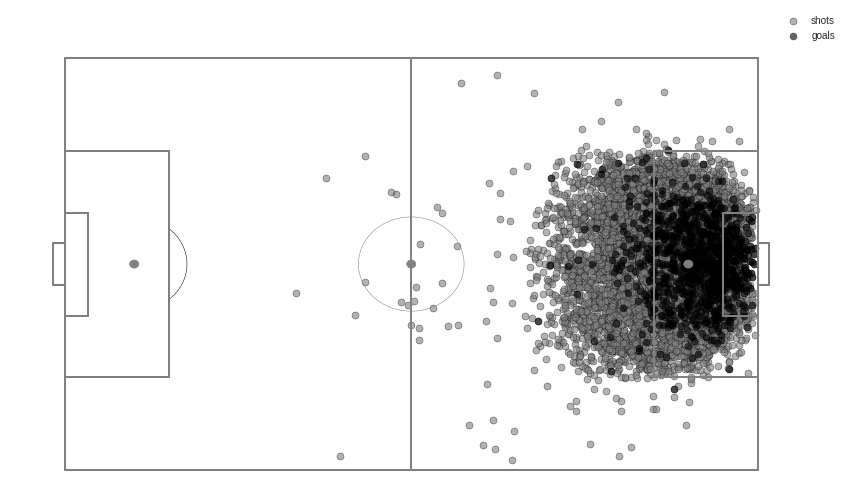

In [ ]:
pitch = pitchplot()
pitch = goals(plt,train[['x location shot','y location shot']].values,'grey','shots')
pitch = goals(plt,train[train['Goal_label']=='Goal'][['x location shot','y location shot']].values,'black','goals')
plt.legend(loc='upper right')
plt.show()

In [ ]:
def allgoals(fig,df):    
    sns.histplot(data=df_regular_play, x="x location shot", y="y location shot",cbar=True,cbar_kws=dict(shrink=.25), pmax=0.85, palette='Reds')
    #px.density_heatmap(df_regular_play, x="x location shot",y ="y location shot")
    plt.axis('off')
    return plt

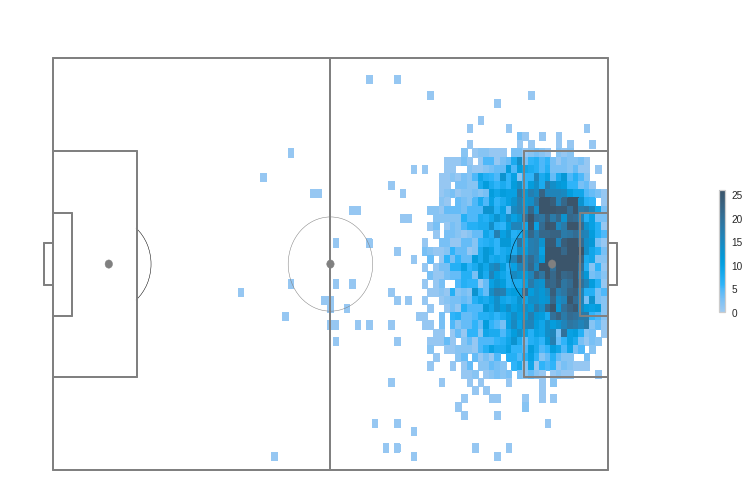

In [ ]:
df_goals = df_regular_play[df_regular_play['Goal_label']=='Goal']
pitch = pitchplot()
pitch = allgoals(pitch,df_goals)
plt.show()

In [ ]:
def playergoals(fig,df,player):    
    df_player = df[df['player name'] == player]
    sns.histplot(data=df_player, x="x location shot", y="y location shot",cbar=True,cbar_kws=dict(shrink=.25), pmax=1)
    plt.title(player, fontsize = 30)
    #px.density_heatmap(df_regular_play, x="x location shot",y ="y location shot")
    plt.axis('off')
    return plt

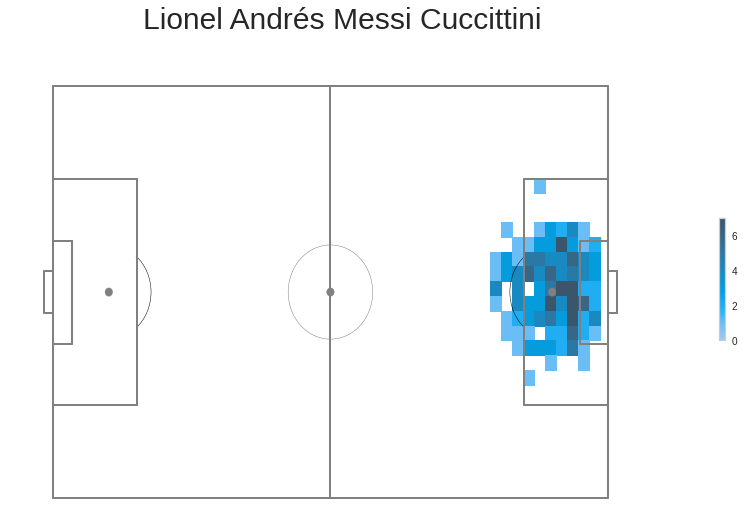

In [ ]:
df_goals = df_regular_play[df_regular_play['Goal_label']=='Goal']
pitch = pitchplot()
pitch = playergoals(pitch,df_goals,'Lionel Andrés Messi Cuccittini')
plt.show()

In [ ]:
distance = train[["shot distance", "binary_outcome"]]
distance["shot distance"] = distance["shot distance"].floordiv(5)
distance["binary_outcome"] = pd.to_numeric(distance["binary_outcome"]) * 100
outcome = distance.groupby("shot distance").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


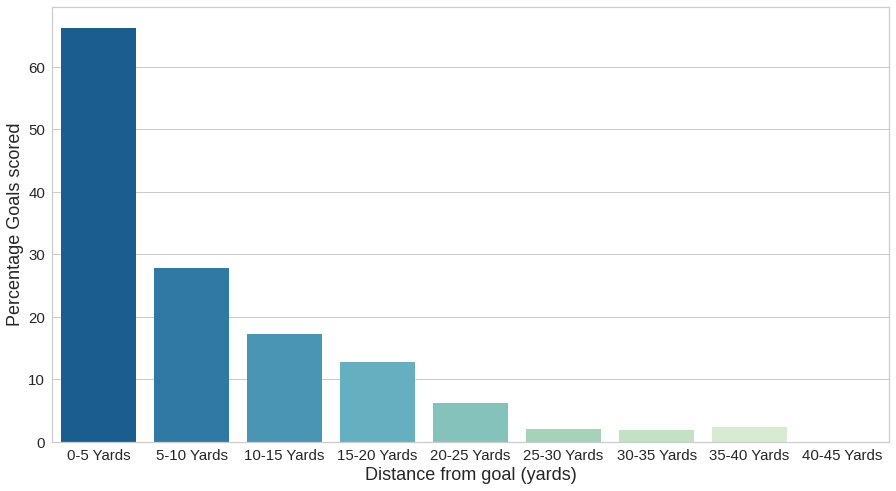

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.barplot(data=outcome,x="shot distance", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(9), ("0-5 Yards", "5-10 Yards", "10-15 Yards", "15-20 Yards", "20-25 Yards", "25-30 Yards", "30-35 Yards", "35-40 Yards", "40-45 Yards"))
plt.xlabel("Distance from goal (yards)", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

Clearly the number of goals are reducing as the distance is increasing. Most of the goals are scored from within the box.

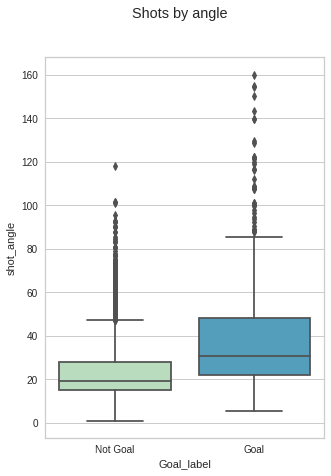

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by angle')
sns.boxplot(x='Goal_label',y='shot_angle',data=df_regular_play, palette = 'GnBu')

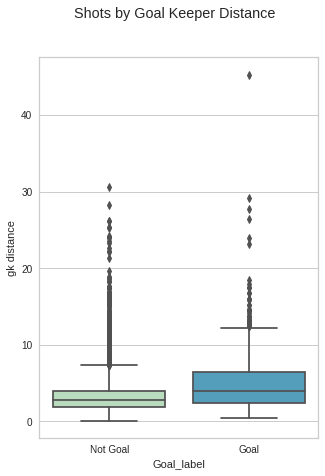

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Distance')
sns.boxplot(x='Goal_label',y='gk distance',data=df_regular_play, palette = 'GnBu')

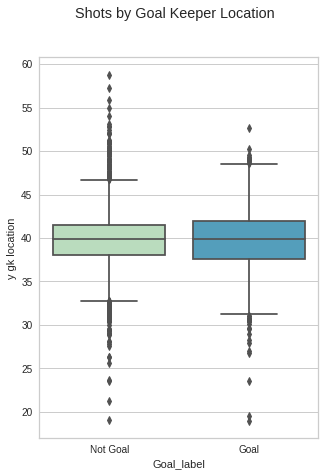

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Location')
sns.boxplot(x='Goal_label',y='y gk location',data=df_regular_play, palette = 'GnBu')

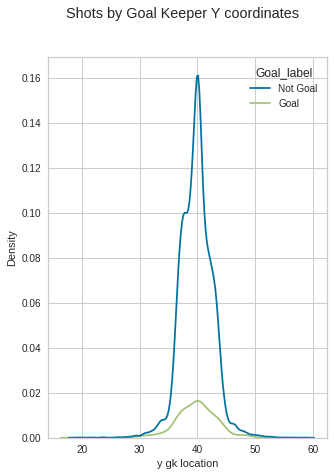

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Y coordinates')
#sns.boxplot(x='Goal_label',y='y gk location',data=df_regular_play, palette = 'GnBu')
sns.kdeplot(data=df_regular_play, x="y gk location", hue="Goal_label")

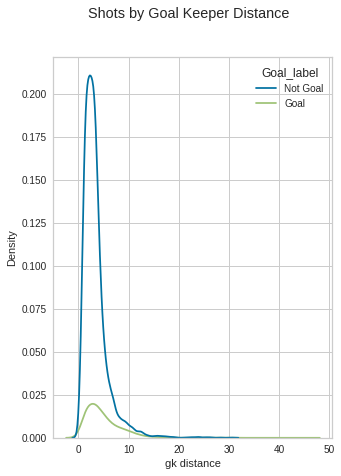

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Distance')
#sns.boxplot(x='Goal_label',y='y gk location',data=df_regular_play, palette = 'GnBu')
sns.kdeplot(data=df_regular_play, x="gk distance", hue="Goal_label")

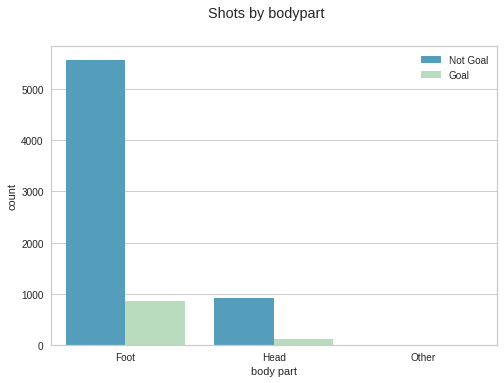

In [ ]:
fig,ax=plt.subplots(1,1)
fig.suptitle('Shots by bodypart')
sns.countplot(x='body part',order=['Foot','Head','Other'],hue='Goal_label',data=df_regular_play, palette = 'GnBu_r')
plt.legend(loc='upper right')

In [ ]:
footed_shots = (df_regular_play['body part']=='Foot')
shots_from_foot = df_regular_play[footed_shots].shape[0]
goals_from_foot = sum(df_regular_play[footed_shots]['binary_outcome'])

headed_shots = (df_regular_play['body part']=='Head')
shots_from_head = df_regular_play[headed_shots].shape[0]
goals_from_head = sum(df_regular_play[headed_shots]['binary_outcome'])

feetperc = goals_from_foot/shots_from_foot
headperc = goals_from_head/shots_from_head

print(feetperc*100,'%')
print(headperc*100,'%')

13.378967019290602 %
11.346153846153847 %


In [ ]:
shots_from_foot = df_regular_play[footed_shots]
shots_from_foot = shots_from_foot[["body part", "binary_outcome"]]
shots_from_head = df_regular_play[headed_shots]
shots_from_head = shots_from_head[["body part", "binary_outcome"]]
bodydf = pd.concat([shots_from_head, shots_from_foot], ignore_index=True)

In [ ]:
bodydf["binary_outcome"] = pd.to_numeric(bodydf["binary_outcome"]) * 100
outcome = bodydf.groupby("body part").mean().reset_index().iloc[0:9]
outcome

,body part,binary_outcome
0,Foot,13.378967
1,Head,11.346154


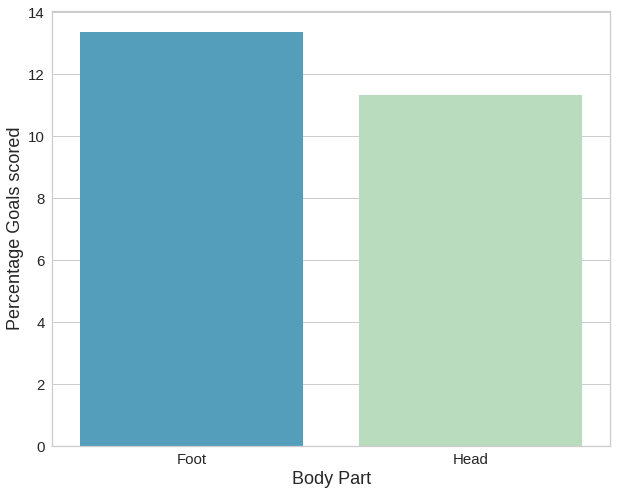

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data=outcome,x="body part", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(2), ("Foot", "Head"))
plt.xlabel("Body Part", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

This shows that headed goals are more effective than footed goals. There is a skewness that we need to consider first.

Text(0.5, 1.0, 'Headed Shots')

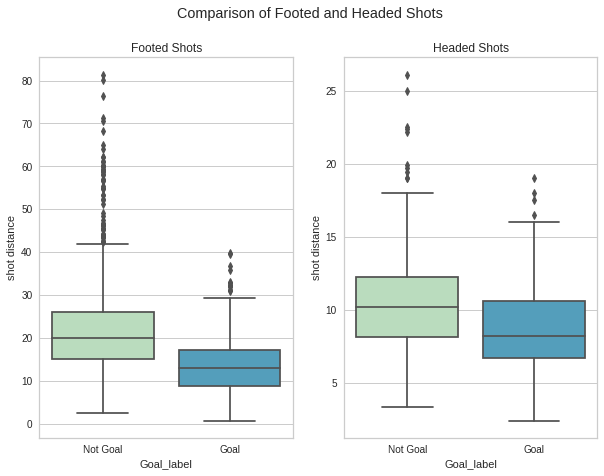

In [ ]:
fig,axis = plt.subplots(1,2, figsize=(10,7))
fig.suptitle('Comparison of Footed and Headed Shots')
sns.boxplot(x='Goal_label',y='shot distance',data=df_regular_play[footed_shots],ax=axis[0],palette='GnBu')
sns.boxplot(x='Goal_label',y='shot distance',data=df_regular_play[headed_shots],ax=axis[1],palette='GnBu')
axis[0].set_title('Footed Shots')
axis[1].set_title('Headed Shots')

In [ ]:
eighteen_yardf = df_regular_play[footed_shots]['shot distance']<18
footed18_shots = df_regular_play[footed_shots][eighteen_yardf].shape[0]
footed18_goals = sum(df_regular_play[footed_shots][eighteen_yardf]['binary_outcome'])

eighteen_yardh = df_regular_play[headed_shots]['shot distance']<18
headed18_shots = df_regular_play[headed_shots][eighteen_yardh].shape[0]
headed18_goals = sum(df_regular_play[headed_shots][eighteen_yardh]['binary_outcome'])

This figure shows that almost all headed shots are taken from a maximum distance of 18 yards.

In [ ]:
foot18_shots = df_regular_play[footed_shots][eighteen_yardf]
foot18_shots = foot18_shots[["body part", "binary_outcome"]]
head18_shots = df_regular_play[headed_shots][eighteen_yardh]
head18_shots = head18_shots[["body part", "binary_outcome"]]
bodydf = pd.concat([head18_shots, foot18_shots], ignore_index=True)

In [ ]:
bodydf["binary_outcome"] = pd.to_numeric(bodydf["binary_outcome"]) * 100
outcome = bodydf.groupby("body part").mean().reset_index().iloc[0:9]
outcome

,body part,binary_outcome
0,Foot,23.461538
1,Head,11.306043


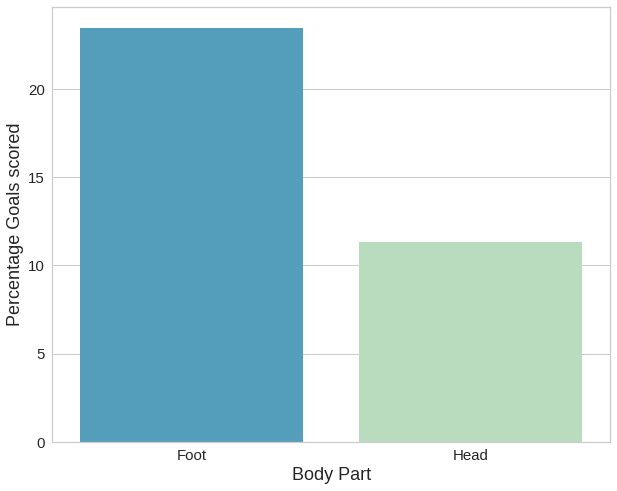

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data=outcome,x="body part", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(2), ("Foot", "Head"))
plt.xlabel("Body Part", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

After checking the goals from the 18 yard distance, it is clear that the footed goals are more effective. 

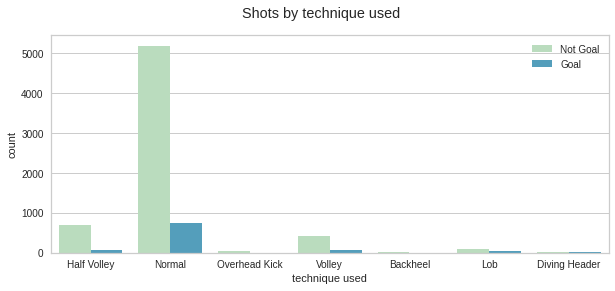

In [ ]:
fig,ax=plt.subplots(1,1, figsize=(10,4))
fig.suptitle('Shots by technique used')
sns.countplot(x='technique used',hue='Goal_label',data=df_regular_play, palette = 'GnBu')
plt.legend(loc='upper right')

In [ ]:
normal_shots = (df_regular_play['technique used']=='Normal') 
volley_shots = (df_regular_play['technique used']=='Volley')
halfvolley_shots = (df_regular_play['technique used']=='Half Volley')
other_shots = (df_regular_play['technique used']=='Lob technique used') | (df_regular_play['technique used']!='Backheel') | (df_regular_play['technique used']!='Diving Header') | (df_regular_play['technique used']!='Overhead Kick')

In [ ]:
shots_normal = df_regular_play[normal_shots].shape[0]
goals_normal = sum(df_regular_play[normal_shots]['binary_outcome'])
perc_normal = goals_normal/shots_normal*100

shots_volley = df_regular_play[volley_shots].shape[0]
goals_volley = sum(df_regular_play[volley_shots]['binary_outcome'])
perc_volley = goals_volley/shots_volley*100

shots_halfvolley = df_regular_play[halfvolley_shots].shape[0]
goals_halfvolley = sum(df_regular_play[halfvolley_shots]['binary_outcome'])
perc_halfvolley = goals_halfvolley/shots_halfvolley*100

shots_other = df_regular_play[other_shots].shape[0]
goals_other = sum(df_regular_play[other_shots]['binary_outcome'])
perc_other = goals_other/shots_other*100

print(perc_normal)
print(perc_volley)
print(perc_halfvolley)
print(perc_other)

12.727272727272727
14.814814814814813
10.424710424710424
13.095875736475628


In [ ]:
play_pattern = train[["technique used", "binary_outcome"]]
play_pattern["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = play_pattern.groupby("technique used").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


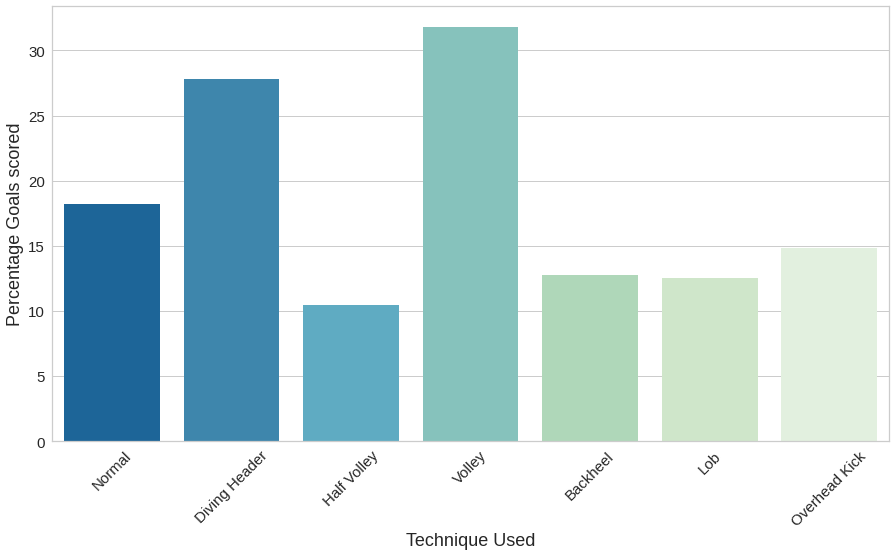

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.barplot(data=outcome,x="technique used", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(7), ("Normal", "Diving Header", "Half Volley", "Volley", "Backheel", "Lob", "Overhead Kick"),rotation=45)
plt.xlabel("Technique Used", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

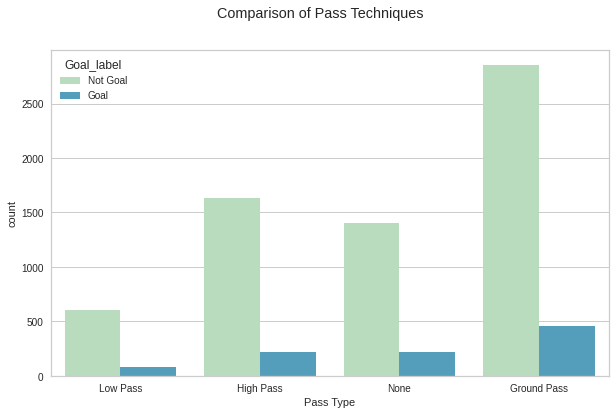

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,6))
fig.suptitle('Comparison of Pass Techniques')
sns.countplot(x='Pass Type',data=df_regular_play,hue ='Goal_label',ax=axis,palette='GnBu')

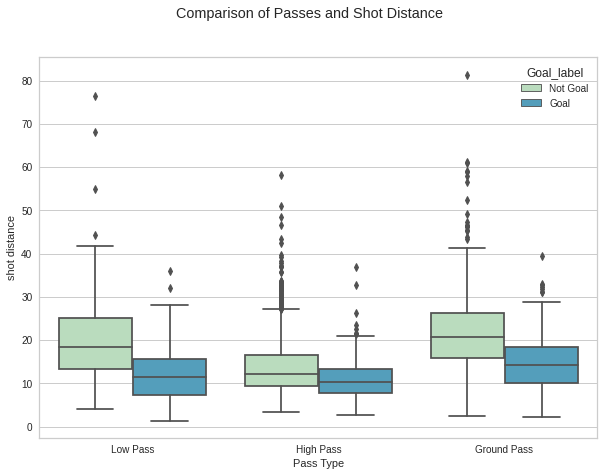

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,7))
fig.suptitle('Comparison of Passes and Shot Distance')
df_none = df_regular_play[df_regular_play['Pass Type']!='None']
sns.boxplot(x='Pass Type',y='shot distance',data=df_none,hue='Goal_label',ax=axis,palette='GnBu')

In [ ]:
pass_type = train[["Pass Type", "binary_outcome"]]
pass_type["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = pass_type.groupby("Pass Type").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


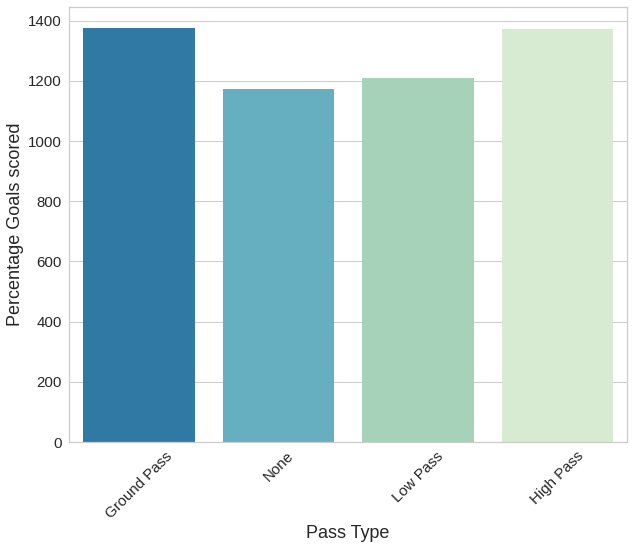

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data=outcome,x="Pass Type", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(4), ("Ground Pass", "None", "Low Pass", "High Pass"),rotation=45)
plt.xlabel("Pass Type", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

Text(0, 0.5, 'Proportion of Goals from Resulting Shots')

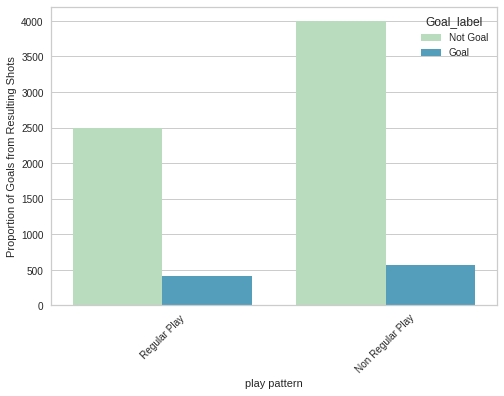

In [ ]:
sns.countplot(hue='Goal_label',x='play pattern',data=train,palette='GnBu')
plt.xticks(rotation=45)
plt.ylabel('Proportion of Goals from Resulting Shots')

In [ ]:
train['play pattern'].value_counts()

Non Regular Play    4565
Regular Play        2903
Name: play pattern, dtype: int64

In [ ]:
play_pattern = train[["play pattern", "binary_outcome"]]
play_pattern["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = play_pattern.groupby("play pattern").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


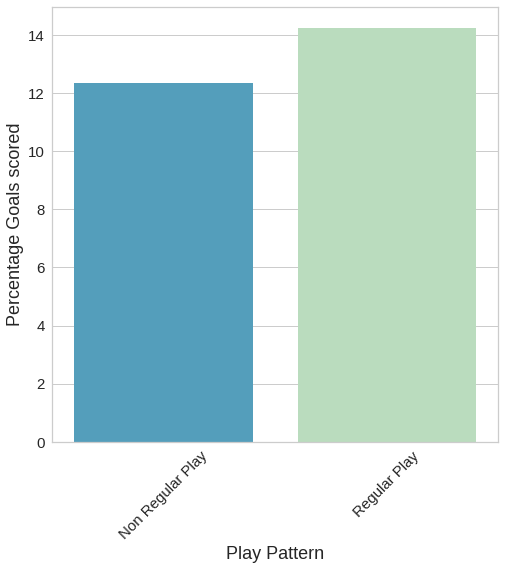

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(data=outcome,x="play pattern", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(2), ("Non Regular Play", "Regular Play"),rotation=45)
plt.xlabel("Play Pattern", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

In [ ]:
shot_type = train[["type of shot", "binary_outcome"]]
shot_type["binary_outcome"] = pd.to_numeric(shot_type["binary_outcome"]) * 100
outcome = shot_type.groupby("type of shot").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


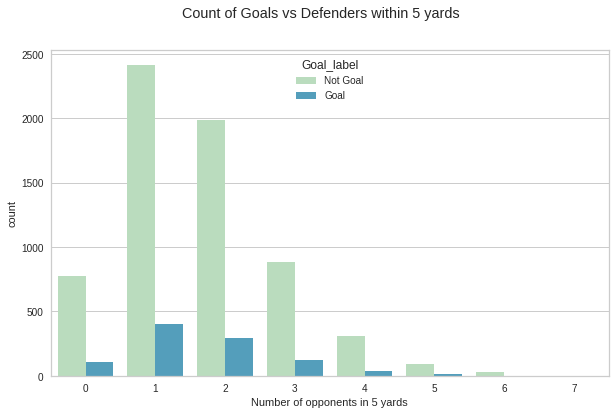

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,6))
fig.suptitle('Count of Goals vs Defenders within 5 yards')
sns.countplot(x='Number of opponents in 5 yards',data=train,hue ='Goal_label',ax=axis, palette='GnBu')

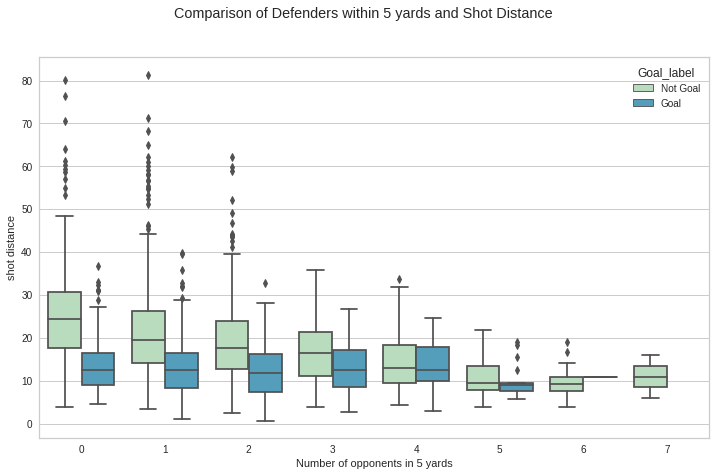

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(12,7))
fig.suptitle('Comparison of Defenders within 5 yards and Shot Distance')
df_none = df_regular_play[df_regular_play['Pass Type']!='None']
sns.boxplot(x='Number of opponents in 5 yards',y='shot distance',data=train,hue='Goal_label',ax=axis, palette='GnBu')

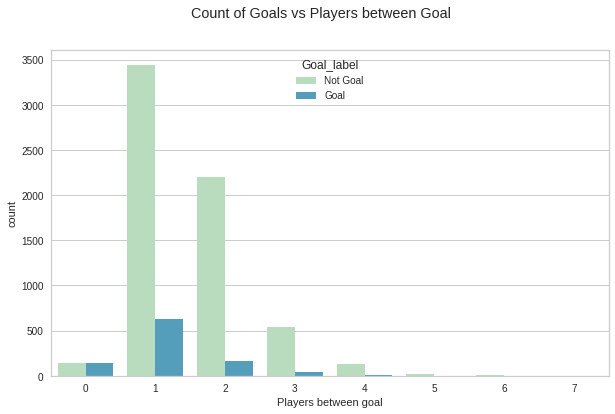

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,6))
fig.suptitle('Count of Goals vs Players between Goal')
sns.countplot(x='Players between goal',data=train,hue ='Goal_label',ax=axis,palette='GnBu')

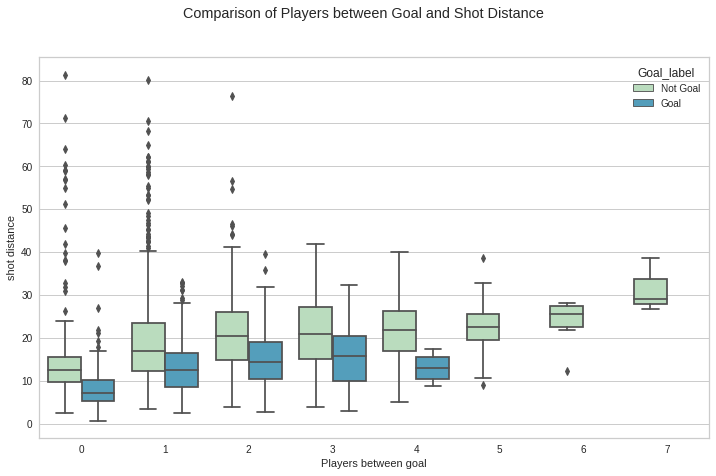

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(12,7))
fig.suptitle('Comparison of Players between Goal and Shot Distance')
sns.boxplot(x='Players between goal',y='shot distance',data=train,hue='Goal_label',ax=axis,palette='GnBu')

Text(0, 0.5, 'Opponents within 5 yard ')

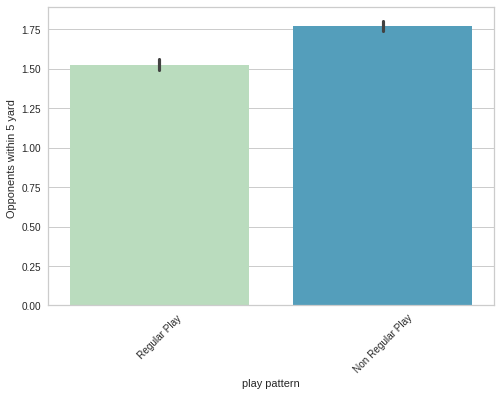

In [ ]:
sns.barplot(y='Number of opponents in 5 yards',x='play pattern',data=train,palette='GnBu')
plt.xticks(rotation=45)
plt.ylabel('Opponents within 5 yard ')

Text(0, 0.5, 'Players between goal')

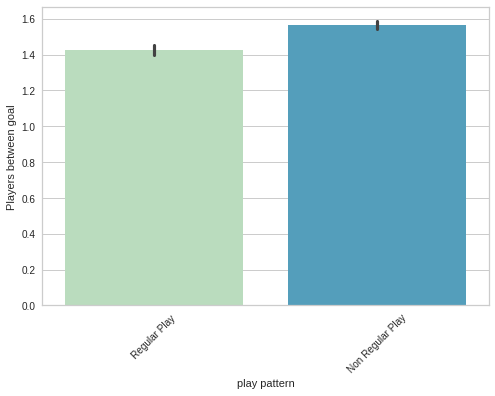

In [ ]:
sns.barplot(y='Players between goal',x='play pattern',data=train,palette='GnBu')
plt.xticks(rotation=45)
plt.ylabel('Players between goal')

As we can see that the number of players between the goal and the shot taker is the least when the play type is a counter attack.

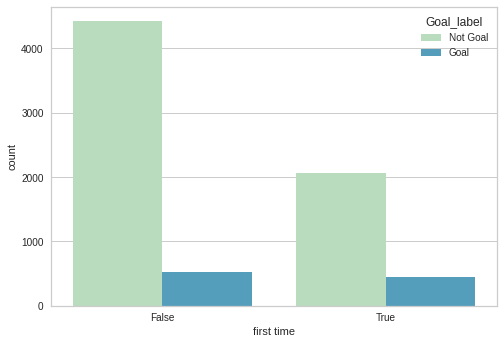

In [ ]:
sns.countplot(x='first time',data=train,palette='GnBu', hue ='Goal_label')

In [ ]:
first_time = train[["first time", "binary_outcome"]]
first_time["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = first_time.groupby("first time").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


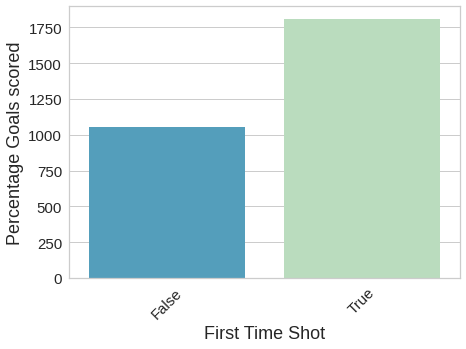

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.barplot(data=outcome,x="first time", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(2), ("False", "True"),rotation=45)
plt.xlabel("First Time Shot", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

It looks like shots taken first time result in goals on a higher rate. Let's analyze this further.

In [ ]:
train.groupby('first time', as_index=False)['shot distance'].mean()

,first time,shot distance
0,False,19.222691
1,True,17.142517


Text(0, 0.5, 'Distance')

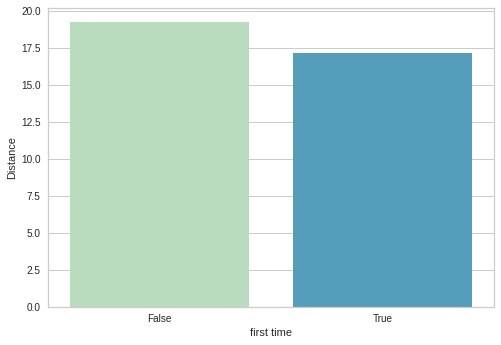

In [ ]:
sns.barplot(y='shot distance',x='first time',data=train,palette='GnBu', ci=False)
plt.ylabel('Distance')

On an average, first time goals are shot from a distance of ~17 yards, while goals that are not scored are shot from ~20 yards.

Text(0, 0.5, 'Players between goal')

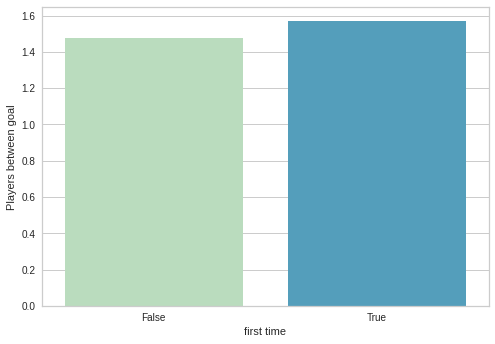

In [ ]:
sns.barplot(y='Players between goal',x='first time',data=train,palette='GnBu', ci=False)
plt.ylabel('Players between goal')

Text(0, 0.5, 'Number of opponents in 5 yards')

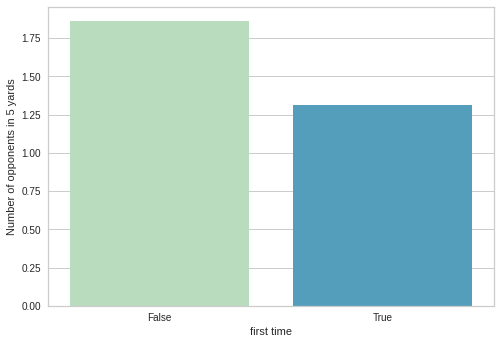

In [ ]:
sns.barplot(y='Number of opponents in 5 yards',x='first time',data=train,palette='GnBu', ci=False)
plt.ylabel('Number of opponents in 5 yards')

In [ ]:
train['official xg']

shot id
690a4746-a671-47e0-bece-6a44a980e032    0.018941
eeb3e791-4c29-47a5-9a5d-6fd235139e3f    0.027518
a8a8caaa-5a8c-4d30-9df2-28e9266d27a1    0.032669
8bc51050-28de-4c1c-b25f-9a64a5c3c93b    0.257564
d95a7ee7-06c9-47c1-9e7c-b2462c53eaf8    0.752807
                                          ...   
3681dbba-aa3a-402a-aa29-baebad73adc8    0.039551
ff77f470-47ee-428d-b018-0f2203ac6641    0.908923
42293ce4-e3d6-4e65-9040-e7f6413fbe44    0.076067
b69a6316-0c39-4623-a255-7c89212b68e5    0.239924
41e31614-c207-4ef7-b0f5-97ff717b3eb2    0.064953
Name: official xg, Length: 7468, dtype: float64

##Let us begin with the preprocessing pipeline for Machine Learning

First we define our categorical and numerical attributes in our data. We will use the following, 
1. One Hot Encoder : For the categorical data
2. Standard Scaler : For numerical data
3. Column Transformer : To encode categorical columns and scale numerical columns

In [ ]:
cat_attributes = ['body part','Pass Type','play pattern','first time']
num_attributes = ['shot distance','shot_angle','Number of opponents in 5 yards', 'Players between goal','x location shot', 'y location shot','gk distance','x gk location','y gk location']
encoder = OneHotEncoder()
scaler = StandardScaler()
transformers = [('cat',encoder,cat_attributes),('num',scaler,num_attributes)]
main_pipeline = ColumnTransformer(transformers)

In [ ]:
processed_X_train = main_pipeline.fit_transform(train)
processed_X_test = main_pipeline.transform(validate)

In [ ]:
processed_X_train

array([[ 1.        ,  0.        ,  1.        , ..., -0.35437032,
        -0.01124191, -0.2076158 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.42773371,
         0.07343243,  0.27391948],
       [ 1.        ,  0.        ,  0.        , ..., -0.31768863,
         0.20044395, -0.58596495],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.86791405,
         0.58147851, -0.13882505],
       [ 1.        ,  0.        ,  1.        , ..., -0.13428015,
        -0.30760213,  0.20512872],
       [ 1.        ,  0.        ,  0.        , ..., -0.46441541,
         0.66615286,  0.75545476]])

In [ ]:
cat_transformed = main_pipeline.transformers[0][1].fit(X_train[cat_attributes], y_train).get_feature_names_out(cat_attributes)

In [ ]:
all_features_transformed = list(num_attributes) + list(cat_transformed)

In [ ]:
len(all_features_transformed)

19

In [ ]:
classifiers = {
    'catboost' : (CatBoostClassifier(),[{"learning_rate": uniform(0,0.5), "max_depth": np.arange(1,15), "n_estimators": np.arange(1, 250)}]),
    'lightgbm'      : (LGBMClassifier(),[{"max_depth" :  np.arange(1, 15),"num_leaves" :  np.arange(0, 250),"learning_rate" : uniform(0, 0.5)}]),
    'xgboost'       : (XGBClassifier(),[{"max_depth" :  np.arange(1, 15), "num_leaves" :  np.arange(0, 250), "eta" : uniform(0, 1)}]),
    'logistic regression'  : (LogisticRegression(max_iter=10000),  [{"C" : uniform(0, 20000)}])
}

In [ ]:
def hyperparameter_opt(classifier, hyperparameter_dist, processed_X_train, y_train, scoring="neg_log_loss", n_iter=20):

    print("Optimizing hyperparameters for {} model...".format(type(classifier).__name__))
    random_search = RandomizedSearchCV(estimator=classifier, param_distributions=hyperparameter_dist, cv=10, verbose=0, scoring=scoring, n_iter=n_iter)
    random_search.fit(processed_X_train, y_train)
    print("Best hyperparameters {0}".format(random_search.best_params_))
    print("Best cross validation score {0}\n".format(random_search.best_score_))

    return pd.DataFrame(random_search.cv_results_), random_search.best_estimator_

In [ ]:
random_cv_results =  {'catboost' : None,
                      'lightgbm' : None,
                      'xgboost' : None,
                      'logistic regression' : None
               }

In [ ]:
def plot_roc_curve(y,y_model_proba,y_statsbomb_proba,model_label):
    fpr,tpr,thresholds = roc_curve(y,y_model_proba[:,1]) # extracting probability for positive class
    fpr_sb,tpr_sb,thresholds_sb = roc_curve(y,y_statsbomb_proba) # statsbomb_xg values
    plt.plot(fpr,tpr,label=model_label)
    plt.plot(fpr_sb,tpr_sb,label='statsbomb')
    plt.plot([0,1],[0,1])
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');

In [ ]:
lr = LogisticRegression()
lr.fit(processed_X_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(processed_X_train)
y_train_proba = lr.predict_proba(processed_X_train)

In [ ]:
statsbomb_proba = train['official xg']

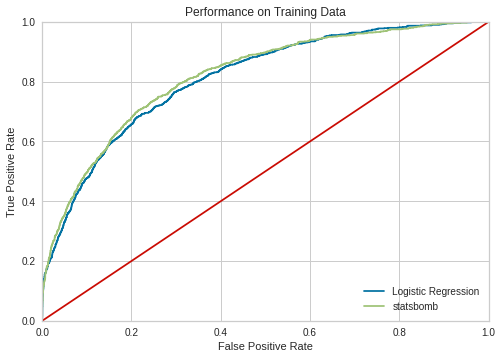

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='Logistic Regression')
plt.title('Performance on Training Data');

In [ ]:
xgb = XGBClassifier()
xgb.fit(processed_X_train,y_train)

XGBClassifier()

In [ ]:
y_train_pred = xgb.predict(processed_X_train)
y_train_proba = xgb.predict_proba(processed_X_train)

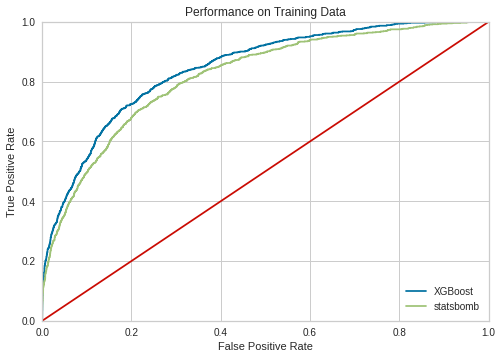

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='XGBoost')
plt.title('Performance on Training Data');

In [ ]:
print('The auc score for the XgBoost model on the training data is {}'.format(round(roc_auc_score(y_train,y_train_proba[:,1]),2)))
print('The auc score for the Statsbomb model on the training data is {}'.format(round(roc_auc_score(y_train,statsbomb_proba),2)))

The auc score for the XgBoost model on the training data is 0.84
The auc score for the Statsbomb model on the training data is 0.82


In [ ]:
X_test_preprocessed = main_pipeline.fit_transform(test)

In [ ]:
lgb = LGBMClassifier()
lgb.fit(processed_X_train,y_train)

LGBMClassifier()

In [ ]:
y_train_pred = lgb.predict(processed_X_train)
y_train_proba = lgb.predict_proba(processed_X_train)

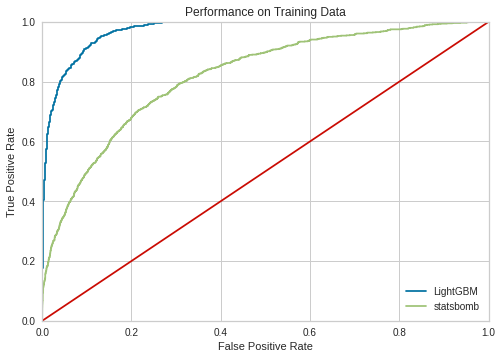

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='LightGBM')
plt.title('Performance on Training Data');

In [ ]:
print('The auc score for the LightGBM model on the training data is {}'.format(round(roc_auc_score(y_train,y_train_proba[:,1]),2)))
print('The auc score for the Statsbomb model on the training data is {}'.format(round(roc_auc_score(y_train,statsbomb_proba),2)))

The auc score for the LightGBM model on the training data is 0.97
The auc score for the Statsbomb model on the training data is 0.82


In [ ]:
cat = CatBoostClassifier()
cat.fit(processed_X_train,y_train)

Learning rate set to 0.02431
0:	learn: 0.6716891	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.6511342	total: 72.3ms	remaining: 36.1s
2:	learn: 0.6312753	total: 81.8ms	remaining: 27.2s
3:	learn: 0.6121121	total: 94ms	remaining: 23.4s
4:	learn: 0.5957359	total: 98.7ms	remaining: 19.6s
5:	learn: 0.5791868	total: 107ms	remaining: 17.7s
6:	learn: 0.5640810	total: 115ms	remaining: 16.4s
7:	learn: 0.5499338	total: 123ms	remaining: 15.3s
8:	learn: 0.5356123	total: 132ms	remaining: 14.5s
9:	learn: 0.5224245	total: 140ms	remaining: 13.8s
10:	learn: 0.5100616	total: 148ms	remaining: 13.3s
11:	learn: 0.4983385	total: 153ms	remaining: 12.6s
12:	learn: 0.4878963	total: 157ms	remaining: 11.9s
13:	learn: 0.4780887	total: 165ms	remaining: 11.7s
14:	learn: 0.4687367	total: 170ms	remaining: 11.1s
15:	learn: 0.4595851	total: 174ms	remaining: 10.7s
16:	learn: 0.4519406	total: 180ms	remaining: 10.4s
17:	learn: 0.4445855	total: 185ms	remaining: 10.1s
18:	learn: 0.4378039	total: 189ms	remaining: 9.75s
19:	learn

In [ ]:
y_train_pred = cat.predict(processed_X_train)
y_train_proba = cat.predict_proba(processed_X_train)

Text(0.5, 1.0, 'Performance on Training Data')

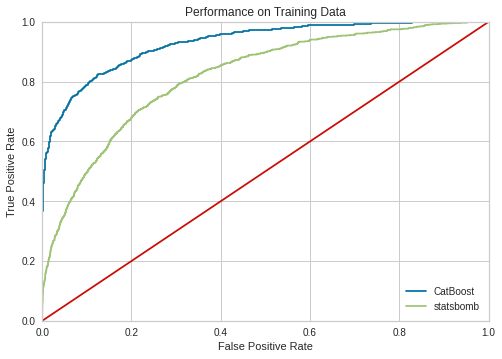

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='CatBoost')
plt.title('Performance on Training Data')

In [ ]:
print('The auc score for the CatBoost model on the training data is {}'.format(round(roc_auc_score(y_train,y_train_proba[:,1]),2)))
print('The auc score for the Statsbomb model on the training data is {}'.format(round(roc_auc_score(y_train,statsbomb_proba),2)))

The auc score for the CatBoost model on the training data is 0.93
The auc score for the Statsbomb model on the training data is 0.82


In [ ]:
for classifier_name, classifier_obj in classifiers.items(): 
    results = hyperparameter_opt(classifier=classifier_obj[0], 
                                 hyperparameter_dist=classifier_obj[1], 
                                 processed_X_train=processed_X_train, 
                                 y_train=y_train, 
                                 scoring="neg_log_loss",
                                 n_iter=5)
    random_cv_results[classifier_name] = results

Streaming output truncated to the last 5000 lines.
18:	learn: 0.5051661	total: 95.1ms	remaining: 481ms
19:	learn: 0.4987744	total: 99.6ms	remaining: 473ms
20:	learn: 0.4926399	total: 104ms	remaining: 466ms
21:	learn: 0.4863907	total: 108ms	remaining: 458ms
22:	learn: 0.4804945	total: 113ms	remaining: 452ms
23:	learn: 0.4747265	total: 117ms	remaining: 445ms
24:	learn: 0.4691353	total: 122ms	remaining: 438ms
25:	learn: 0.4641180	total: 126ms	remaining: 432ms
26:	learn: 0.4591256	total: 131ms	remaining: 426ms
27:	learn: 0.4542542	total: 135ms	remaining: 420ms
28:	learn: 0.4495416	total: 140ms	remaining: 414ms
29:	learn: 0.4451388	total: 144ms	remaining: 409ms
30:	learn: 0.4408055	total: 149ms	remaining: 402ms
31:	learn: 0.4367464	total: 153ms	remaining: 397ms
32:	learn: 0.4326993	total: 157ms	remaining: 391ms
33:	learn: 0.4285887	total: 165ms	remaining: 393ms
34:	learn: 0.4247331	total: 174ms	remaining: 397ms
35:	learn: 0.4212354	total: 179ms	remaining: 393ms
36:	learn: 0.4176428	total: 1

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
from sklearn.model_selection import validation_curve
validation_set_predictions = {'lightgbm' : None,'xgboost' : None,'logistic regression' : None, 'catboost' : None }

for classifier_name, classifier_obj in random_cv_results.items():
  try:
    classifier = random_cv_results[classifier_name][1]
    y_train_pred = classifier.predict_proba(processed_X_train)
    y_valid_pred = classifier.predict_proba(processed_X_test)

    validation_set_predictions[classifier_name] = y_valid_pred
    
    print(classifier_name)
    print("training set results: {0}".format(log_loss(y_train, y_train_pred, normalize=True)))
    print("validation set results: {0}".format(log_loss(y_valid, y_valid_pred, normalize=True)))
    
  except TypeError:
    continue

catboost
training set results: 0.2952140014842253
validation set results: 0.31736389059916464
lightgbm
training set results: 0.3024277573656228
validation set results: 0.31949260358602866
xgboost
training set results: 0.19243117485859595
validation set results: 0.33565946556925647
logistic regression
training set results: 0.31002072615891196
validation set results: 0.31266230759382185


In [ ]:
ensemble_xg_model = VotingClassifier(estimators=[('lightgbm', random_cv_results["lightgbm"][1]), 
                                                 ('xgboost', random_cv_results["xgboost"][1]), 
                                                 ('catboost', random_cv_results["catboost"][1])], 
                                     voting='soft')

ensemble_xg_model.fit(processed_X_train, y_train)
y_valid_pred = ensemble_xg_model.predict_proba(processed_X_test)
print("validation set results: {0}".format(log_loss(y_valid, y_valid_pred, normalize=True)))

0:	learn: 0.5632467	total: 1.2ms	remaining: 186ms
1:	learn: 0.4870921	total: 2.17ms	remaining: 167ms
2:	learn: 0.4397497	total: 3.06ms	remaining: 156ms
3:	learn: 0.4084368	total: 3.88ms	remaining: 147ms
4:	learn: 0.3864920	total: 4.69ms	remaining: 142ms
5:	learn: 0.3704324	total: 5.58ms	remaining: 139ms
6:	learn: 0.3595590	total: 6.46ms	remaining: 138ms
7:	learn: 0.3519590	total: 7.41ms	remaining: 137ms
8:	learn: 0.3466208	total: 8.27ms	remaining: 135ms
9:	learn: 0.3411964	total: 9.19ms	remaining: 134ms
10:	learn: 0.3376465	total: 10.1ms	remaining: 133ms
11:	learn: 0.3352674	total: 11ms	remaining: 132ms
12:	learn: 0.3333496	total: 11.9ms	remaining: 131ms
13:	learn: 0.3308950	total: 12.7ms	remaining: 129ms
14:	learn: 0.3281567	total: 13.6ms	remaining: 128ms
15:	learn: 0.3265295	total: 14.5ms	remaining: 127ms
16:	learn: 0.3254718	total: 15.4ms	remaining: 126ms
17:	learn: 0.3237561	total: 16.3ms	remaining: 125ms
18:	learn: 0.3220092	total: 17.2ms	remaining: 124ms
19:	learn: 0.3213279	tota

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
binary_xgbmodel = random_cv_results["xgboost"][1].fit(processed_full_X_train, y_train.append(y_valid))
binary_catmodel = random_cv_results["catboost"][1].fit(processed_full_X_train, y_train.append(y_valid))
binary_lgbmodel = random_cv_results["lightgbm"][1].fit(processed_full_X_train, y_train.append(y_valid))

0:	learn: 0.6209535	total: 8.91ms	remaining: 552ms
1:	learn: 0.5652712	total: 12.4ms	remaining: 378ms
2:	learn: 0.5218010	total: 17.3ms	remaining: 347ms
3:	learn: 0.4857994	total: 20.8ms	remaining: 307ms
4:	learn: 0.4570106	total: 30.3ms	remaining: 351ms
5:	learn: 0.4328404	total: 48.2ms	remaining: 458ms
6:	learn: 0.4130278	total: 52.8ms	remaining: 423ms
7:	learn: 0.3966384	total: 56.4ms	remaining: 388ms
8:	learn: 0.3828634	total: 75.6ms	remaining: 454ms
9:	learn: 0.3717467	total: 82ms	remaining: 434ms
10:	learn: 0.3618977	total: 87.6ms	remaining: 414ms
11:	learn: 0.3536885	total: 94.9ms	remaining: 403ms
12:	learn: 0.3468744	total: 98.6ms	remaining: 379ms
13:	learn: 0.3410699	total: 110ms	remaining: 386ms
14:	learn: 0.3359990	total: 129ms	remaining: 411ms
15:	learn: 0.3315432	total: 146ms	remaining: 429ms
16:	learn: 0.3282632	total: 154ms	remaining: 417ms
17:	learn: 0.3249950	total: 166ms	remaining: 415ms
18:	learn: 0.3230034	total: 174ms	remaining: 403ms
19:	learn: 0.3207244	total: 19

In [ ]:
binary_lr_model = random_cv_results["logistic regression"][1].fit(processed_full_X_train, y_train.append(y_valid))

In [ ]:
X_test_preprocessed = main_pipeline.fit_transform(test)

In [ ]:
statsbomb_proba_test= test['official xg']

In [ ]:
y_test_pred = binary_lr_model.predict(X_test_preprocessed)
y_test_proba = binary_lr_model.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.84')

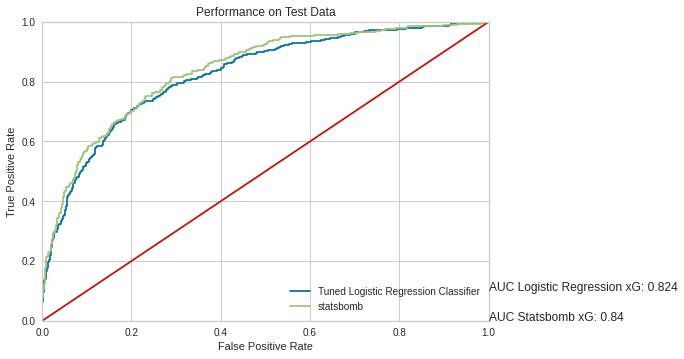

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned Logistic Regression Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC Logistic Regression xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned Logistic Regression model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
y_test_pred = binary_xgbmodel.predict(X_test_preprocessed)
y_test_proba = binary_xgbmodel.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.84')

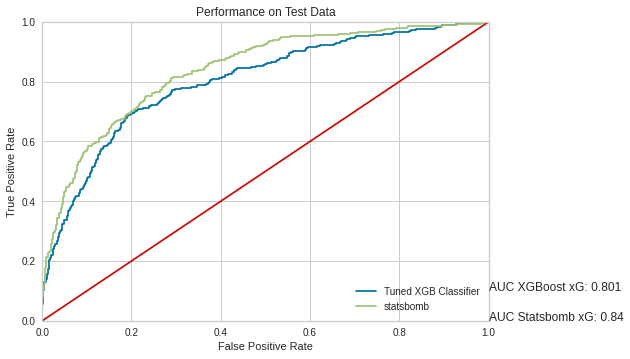

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned XGB Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC XGBoost xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned XGBoost model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
y_test_pred = binary_lgbmodel.predict(X_test_preprocessed)
y_test_proba = binary_lgbmodel.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.84')

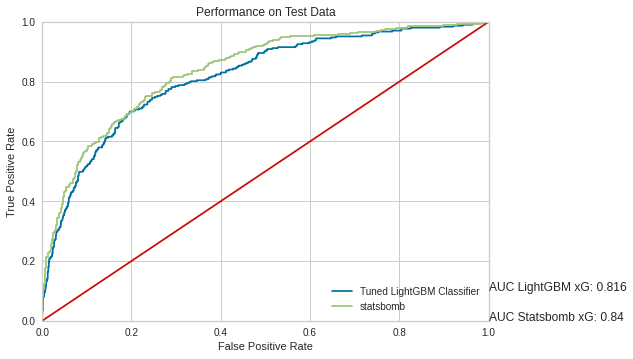

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned LightGBM Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC LightGBM xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned LightGBM model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
y_test_pred = binary_catmodel.predict(X_test_preprocessed)
y_test_proba = binary_catmodel.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.84')

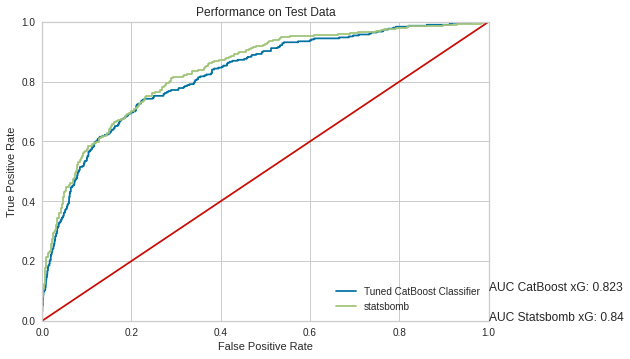

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned CatBoost Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC CatBoost xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned CatBoost model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
logit_coefs = binary_lr_model.coef_
logit_coefs[0]

array([-0.08241951, -0.91635726, -0.05164229, -0.39384838, -0.40525183,
       -0.14803426, -0.5592553 , -0.43952146, -0.5556064 , -0.44317037,
       -1.52976118,  0.27338906, -0.09968207, -0.39271053, -0.61687289,
        0.07181805, -0.0336103 , -0.39088635, -0.03677007])

In [ ]:
xgb_importances = binary_xgbmodel.feature_importances_
xgb_importances

array([0.12537093, 0.        , 0.04136473, 0.05434451, 0.03127528,
       0.04465916, 0.0370964 , 0.        , 0.04551385, 0.        ,
       0.06768027, 0.10602297, 0.03563055, 0.1920847 , 0.03986996,
       0.03823037, 0.04618715, 0.05694861, 0.03772057], dtype=float32)

In [ ]:
lgb_importances = binary_lgbmodel.feature_importances_
lgb_importances

array([ 4,  0,  2,  1,  1,  0,  2,  0,  1,  0,  6, 24,  4,  7,  8,  6, 10,
       10, 14])

In [ ]:
cat_importances = binary_catmodel.feature_importances_
cat_importances

array([ 2.15015197,  3.12278295,  1.98455298,  1.35832003,  0.07119724,
        1.59383346,  1.16280143,  0.29684719,  1.55772241,  1.34925747,
       12.19741295, 26.19453693,  3.08269503, 11.37641689,  7.20350078,
        4.32074502,  8.58871011, 11.00127916,  1.38723599])

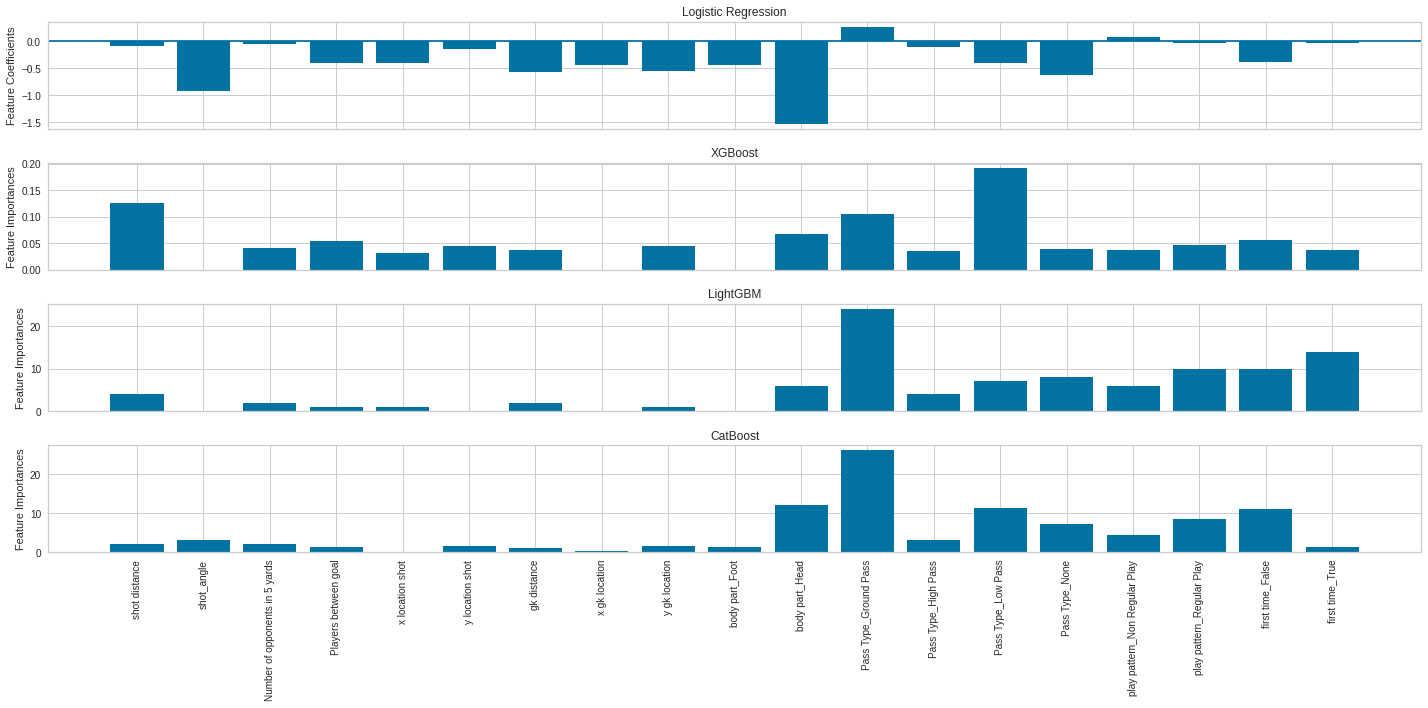

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=(20,10),sharex=True)

#logistic regression plot
ax1.bar(range(len(logit_coefs[0])),logit_coefs[0],align='center')
ax1.axhline(y=0)
ax1.set_ylabel('Feature Coefficients')
ax1.set_title('Logistic Regression')

#xgboost plot
ax2.bar(range(len(xgb_importances)),xgb_importances,align='center')
ax2.set_ylabel('Feature Importances')
ax2.set_title('XGBoost')

#gradboost plot
ax3.bar(range(len(lgb_importances)),lgb_importances,align='center')
ax3.set_ylabel('Feature Importances')
ax3.set_title('LightGBM')

ax4.bar(range(len(cat_importances)),cat_importances,align='center')
ax4.set_xticks(np.arange(0,len(xgb_importances),1))
ax4.set_xticklabels(all_features_transformed)
plt.xticks(rotation=90)
ax4.set_ylabel('Feature Importances')
ax4.set_title('CatBoost')



plt.tight_layout()

In [ ]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(processed_full_X_train, mode="classification",
                                              class_names=train['Goal_label'].unique(),
                                              feature_names=all_features_transformed,
                                             )

In [ ]:
pkl.dump(binary_xgbmodel, open('binary_xgbmodel.pkl', 'wb'))
pkl.dump(binary_lgbmodel, open('binary_lgbmodel.pkl', 'wb'))
pkl.dump(binary_catmodel, open('binary_catmodel.pkl', 'wb'))

In [ ]:
pkl.dump(binary_lr_model, open('binary_lr_model.pkl', 'wb'))

In [ ]:
binary_xgbmodel = pkl.load(open('binary_xgbmodel.pkl', 'rb'))
binary_lgbmodel = pkl.load(open('binary_lgbmodel.pkl', 'rb'))
binary_catmodel = pkl.load(open('binary_catmodel.pkl', 'rb'))

In [ ]:
binary_lr_model = pkl.load(open('binary_lr_model.pkl', 'rb'))

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

test_set_predictions = {'lightgbm' : None,
                        'xgboost' : None,
                        'catboost' : None,
                        'logistic regression': None}

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_xgbmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_xgbmodel.predict_proba(X_test_preprocessed)

test_set_predictions['xgboost'] = y_test_pred
    
print('XGBoost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

XGBoost
test set results: 0.3134145029161513



In [ ]:
eli5.explain_weights_xgboost(binary_xgbmodel, feature_names = np.array(all_features_transformed), top=100)
#xgb, vec=None, top=20, target_names=None, targets=None, feature_names=None, feature_re=None, feature_filter=None, importance_type='gain')

Weight,Feature
0.1921,Pass Type_Low Pass
0.1254,shot distance
0.1060,Pass Type_Ground Pass
0.0677,body part_Head
0.0569,first time_False
0.0543,Players between goal
0.0462,play pattern_Regular Play
0.0455,y gk location
0.0447,y location shot
0.0414,Number of opponents in 5 yards


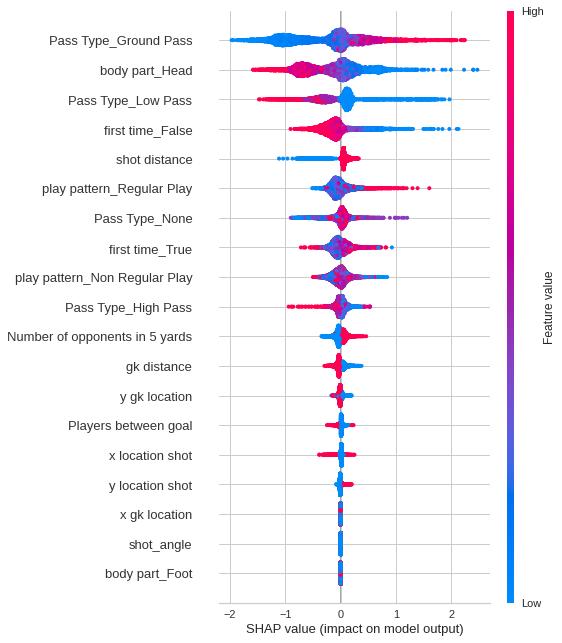

In [ ]:
explainer = shap.TreeExplainer(binary_xgbmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train["Goal_label"].unique())

Text(0, 0.5, 'XGBoost xG')

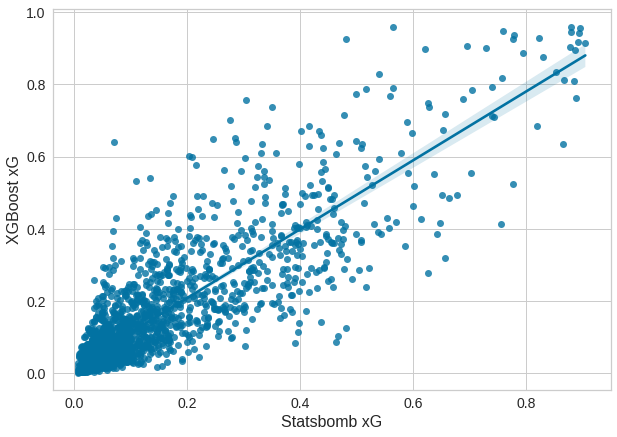

In [ ]:
shot_test_set_results = test.copy()
shot_test_set_results["xgboost xg"] = test_set_predictions["xgboost"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
#shot_test_set_results.plot("xgboost xg", "official xg", kind="scatter", ax=ax, alpha=0.25)
sns.regplot(data=shot_test_set_results,y="xgboost xg",x="official xg")
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("XGBoost xG", size=16)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_lr_model.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_lr_model.predict_proba(X_test_preprocessed)
y_test_pred_val = binary_lr_model.predict(X_test_preprocessed)
test_set_predictions['logistic regression'] = y_test_pred
    
print('Logistic Regression')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))
#print(classification_report(y_test,y_test_pred_val))
#print(confusion_matrix(y_test, y_test_pred_val))

Logistic Regression
test set results: 0.299873193721975



Text(0, 0.5, 'Logistic Regression xG')

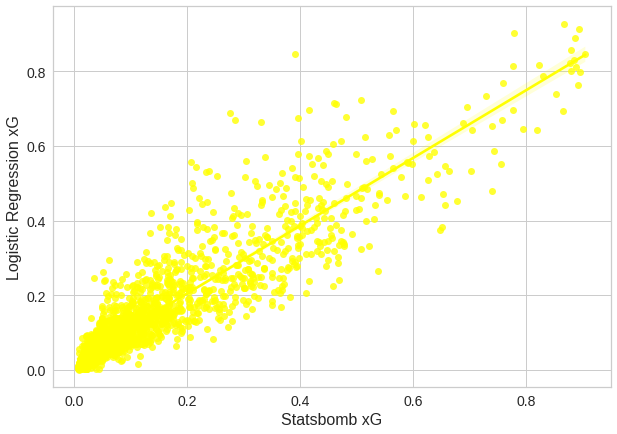

In [ ]:
shot_test_set_results["logreg xg"] = test_set_predictions["logistic regression"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
sns.regplot(data=shot_test_set_results,y="logreg xg",x="official xg", color='yellow')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("Logistic Regression xG", size=16)

In [ ]:
eli5.explain_weights(binary_lr_model, feature_names = np.array(all_features_transformed), top=100)

Weight?,Feature
+0.273,Pass Type_Ground Pass
+0.072,play pattern_Non Regular Play
-0.034,play pattern_Regular Play
-0.037,first time_True
-0.052,Number of opponents in 5 yards
-0.082,shot distance
-0.100,Pass Type_High Pass
-0.148,y location shot
-0.391,first time_False
-0.393,Pass Type_Low Pass


In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_catmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_catmodel.predict_proba(X_test_preprocessed)

test_set_predictions['catboost'] = y_test_pred
    
print('CatBoost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

0:	learn: 0.6209535	total: 5.76ms	remaining: 357ms
1:	learn: 0.5652712	total: 9.2ms	remaining: 281ms
2:	learn: 0.5218010	total: 12.5ms	remaining: 250ms
3:	learn: 0.4857994	total: 16.1ms	remaining: 237ms
4:	learn: 0.4570106	total: 19.5ms	remaining: 226ms
5:	learn: 0.4328404	total: 23ms	remaining: 218ms
6:	learn: 0.4130278	total: 26.4ms	remaining: 211ms
7:	learn: 0.3966384	total: 29.7ms	remaining: 204ms
8:	learn: 0.3828634	total: 33.1ms	remaining: 199ms
9:	learn: 0.3717467	total: 37.1ms	remaining: 196ms
10:	learn: 0.3618977	total: 40.7ms	remaining: 192ms
11:	learn: 0.3536885	total: 45.2ms	remaining: 192ms
12:	learn: 0.3468744	total: 48.7ms	remaining: 187ms
13:	learn: 0.3410699	total: 52.1ms	remaining: 182ms
14:	learn: 0.3359990	total: 55.6ms	remaining: 178ms
15:	learn: 0.3315432	total: 59.1ms	remaining: 174ms
16:	learn: 0.3282632	total: 62.6ms	remaining: 169ms
17:	learn: 0.3249950	total: 66ms	remaining: 165ms
18:	learn: 0.3230034	total: 69.5ms	remaining: 161ms
19:	learn: 0.3207244	total:

In [ ]:
eli5.explain_weights_catboost(binary_catmodel, feature_names = np.array(all_features_transformed), top=100)

Weight,Feature
0.2619,Pass Type_Ground Pass
0.1220,body part_Head
0.1138,Pass Type_Low Pass
0.1100,first time_False
0.0859,play pattern_Regular Play
0.0720,Pass Type_None
0.0432,play pattern_Non Regular Play
0.0312,shot_angle
0.0308,Pass Type_High Pass
0.0215,shot distance


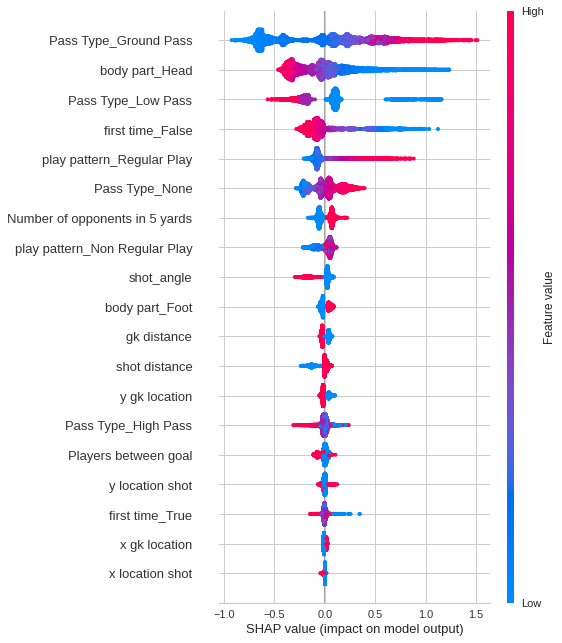

In [ ]:
explainer = shap.TreeExplainer(binary_catmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train["Goal_label"].unique())

Text(0, 0.5, 'Catboost xG')

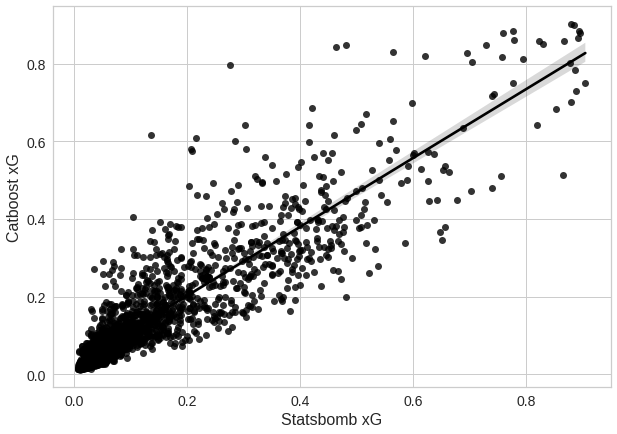

In [ ]:
shot_test_set_results["catboost xg"] = test_set_predictions["catboost"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
#shot_test_set_results.plot("official xg", "catboost xg", color = "black",kind="scatter", ax=ax, alpha=0.25)
sns.regplot(data=shot_test_set_results,y="catboost xg",x="official xg", color='black')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("Catboost xG", size=16)

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)


#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_lgbmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_lgbmodel.predict_proba(X_test_preprocessed)

test_set_predictions['lightgbm'] = y_test_pred
    
print('Light Gradient Boost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

Light Gradient Boost
test set results: 0.3057187843739998



In [ ]:
eli5.explain_weights_lightgbm(binary_lgbmodel, feature_names = np.array(all_features_transformed), top=100)

Weight,Feature
0.4746,Pass Type_Ground Pass
0.1962,play pattern_Regular Play
0.1238,Pass Type_Low Pass
0.0729,body part_Head
0.0487,shot distance
0.0248,first time_False
0.0157,first time_True
0.0111,Pass Type_None
0.0095,y gk location
0.0058,Pass Type_High Pass


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


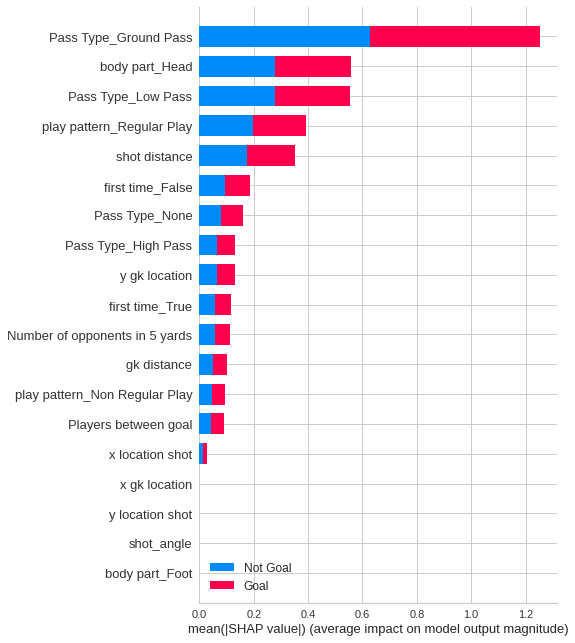

In [ ]:
explainer = shap.TreeExplainer(binary_lgbmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train["Goal_label"].unique())

Text(0, 0.5, 'LightGBM xG')

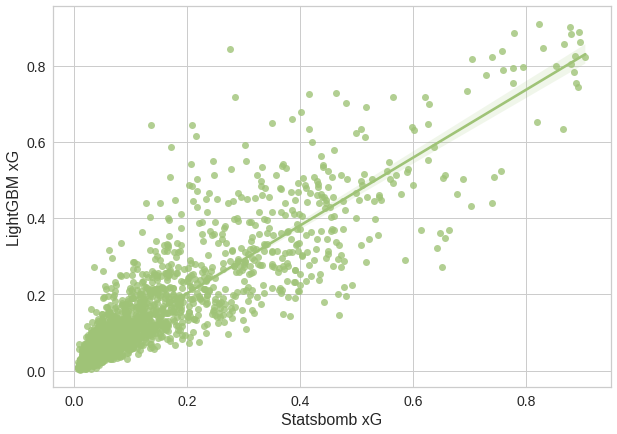

In [ ]:
shot_test_set_results["lightgbm xg"] = test_set_predictions["lightgbm"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
sns.regplot(data=shot_test_set_results,y="lightgbm xg",x="official xg", color='g')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("LightGBM xG", size=16)

In [ ]:
def freeze_frame1(game_json, shot_id,ax=ax):
    pitchplot()
    goalkeeper_x = 120
    goalkeeper_y = 40
    player_list_x = []
    player_list_y = []
    player_name = []
    team_name = []
    location_of_shot_x = 0
    location_of_shot_y = 0
    shot_end_location_x = 0
    shot_end_location_y = 0
    teammate_x = []
    teammate_y = []
    
    for events in game_json:
        if events['id'] == shot_id:
            location_of_shot_x = events['location'][0]
            location_of_shot_y = events['location'][1]
            shot_end_location_x = events['shot']['end_location'][0]
            shot_end_location_y = events['shot']['end_location'][1]

            if "freeze_frame" in events["shot"]:
                for players in events['shot']['freeze_frame']:
                    if (players['teammate'] == False):
                        player_list_x.append(players['location'][0])
                        player_list_y.append(players['location'][1])
                        player_name.append(events['player']['name'])
                        team_name.append(events['possession_team'])
                    elif (players['teammate'] == True):
                        teammate_x.append(players['location'][0])
                        teammate_y.append(players['location'][1])
                        
                    if ((players['position']['name'] == 'Goalkeeper') and (players['teammate'] == False)):
                        goalkeeper_x = players['location'][0]
                        goalkeeper_y = players['location'][1]
          
    plt.scatter(player_list_x, player_list_y, color = 'black')
    plt.scatter(teammate_x, teammate_y, color = 'brown')
    plt.scatter(location_of_shot_x, location_of_shot_y, s=200)
    plt.scatter(goalkeeper_x, goalkeeper_y, s=100, color='red')
    plt.scatter(shot_end_location_x, shot_end_location_y, s=100, color='green')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,36], color = 'red', linestyle = 'dashed')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,44], color = 'red', linestyle = 'dashed')
    plt.title(player_name[0], fontsize = 30)
    return plt

In [ ]:
def freeze_frame2(game_json, shot_id,ax=ax):
    halfpitchplot()
    goalkeeper_x = 120
    goalkeeper_y = 40
    player_list_x = []
    player_list_y = []
    player_name = []
    team_name = []
    location_of_shot_x = 0
    location_of_shot_y = 0
    shot_end_location_x = 0
    shot_end_location_y = 0
    teammate_x = []
    teammate_y = []
    
    for events in game_json:
        if events['id'] == shot_id:
            location_of_shot_x = events['location'][0]
            location_of_shot_y = events['location'][1]
            shot_end_location_x = events['shot']['end_location'][0]
            shot_end_location_y = events['shot']['end_location'][1]

            if "freeze_frame" in events["shot"]:
                for players in events['shot']['freeze_frame']:
                    if (players['teammate'] == False):
                        player_list_x.append(players['location'][0])
                        player_list_y.append(players['location'][1])
                        player_name.append(events['player']['name'])
                        team_name.append(events['possession_team'])
                    elif (players['teammate'] == True):
                        teammate_x.append(players['location'][0])
                        teammate_y.append(players['location'][1])
                        
                    if ((players['position']['name'] == 'Goalkeeper') and (players['teammate'] == False)):
                        goalkeeper_x = players['location'][0]
                        goalkeeper_y = players['location'][1]
          
    plt.scatter(player_list_x, player_list_y, color = 'black')
    plt.scatter(teammate_x, teammate_y, color = 'brown')
    plt.scatter(location_of_shot_x, location_of_shot_y, s=200)
    plt.scatter(goalkeeper_x, goalkeeper_y, s=100, color='red')
    plt.scatter(shot_end_location_x, shot_end_location_y, s=100, color='green')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,36], color = 'red', linestyle = 'dashed')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,44], color = 'red', linestyle = 'dashed')
    plt.title(player_name[0], fontsize = 30)
    return plt

In [ ]:
predicted_xg=0.25*shot_test_set_results['xgboost xg']+0.25*shot_test_set_results['lightgbm xg']+0.25*shot_test_set_results['logreg xg']+(1-0.75)*shot_test_set_results['catboost xg']

In [ ]:
shot_test_set_results['predicted xg'] = predicted_xg

In [ ]:
shot_test_set_results.columns

Index(['play pattern', 'x location shot', 'y location shot', 'duration',
       'outcome', 'technique used', 'first time', 'x gk location',
       'y gk location', 'body part', 'type of shot',
       'Number of opponents in 5 yards', 'Players between goal', 'player name',
       'Team Name', 'official xg', 'Pass id', 'Pass Type', 'game_id',
       'season_id', 'distance_from_goalpost_a', 'distance_from_goalpost_b',
       'shot_angle', 'shot distance', 'gk distance', 'Goal_label',
       'binary_outcome', 'xgboost xg', 'logreg xg', 'catboost xg',
       'lightgbm xg', 'predicted xg'],
      dtype='object')

In [ ]:
df_player_level = shot_test_set_results[['player name','binary_outcome','predicted xg']]
df_player_level=df_player_level.groupby(['player name']).sum()
df_player_level['xG_Diff']=df_player_level['binary_outcome']-df_player_level['predicted xg']

df_player_level_xG=df_player_level.sort_values(by=['xG_Diff'],ascending=False)
df_player_level_xG=df_player_level_xG.round(1)
df_player_level_xG.columns=['goals','xG_sum','xG_Diff']
df_player_level_xG.head(10)

,goals,xG_sum,xG_Diff
player name,,,
Lionel Andrés Messi Cuccittini,81,60.1,20.9
Luis Alberto Suárez Díaz,29,24.2,4.8
Carles Puyol i Saforcada,5,2.5,2.5
Alexis Alejandro Sánchez Sánchez,8,5.6,2.4
Rubén Castro Martín,3,0.8,2.2
Sergio Busquets i Burgos,3,1.1,1.9
Arturo Erasmo Vidal Pardo,3,1.2,1.8
Antoine Griezmann,6,4.3,1.7
Eiður Smári Guðjohnsen,3,1.4,1.6


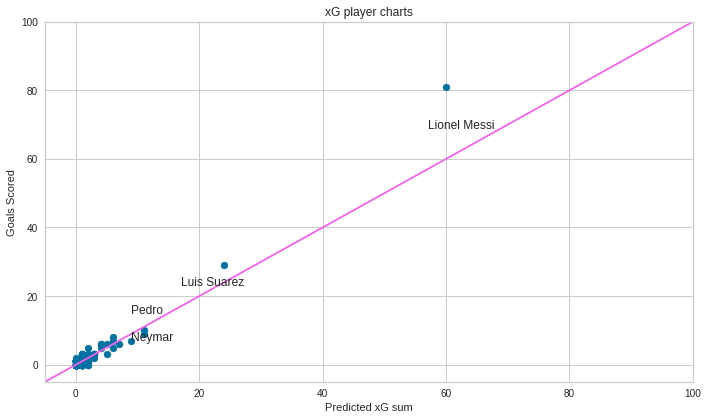

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(round(df_player_level_xG['xG_sum'],0),df_player_level_xG['goals'])
plt.plot([-5,100],[-5,100],color="#f65ef0")
plt.xlabel('Predicted xG sum')
plt.ylabel('Goals Scored')
plt.xlim([-5,100])
plt.ylim([-5,100])
plt.annotate('Lionel Messi',xy=(57,69),xytext=(57,69))
plt.annotate('Luis Suarez',xy=(17,23),xytext=(17,23))
plt.annotate('Pedro',xy=(9,15),xytext=(9,15))
plt.annotate('Neymar',xy=(9,7),xytext=(9,7))
plt.title('xG player charts')
plt.tight_layout()
plt.savefig('xg_player_charts.png')

In [ ]:
match_level_xg = shot_test_set_results[['x location shot','y location shot','Team Name','player name','binary_outcome','predicted xg']]

In [ ]:
season_xg=match_level_xg[['player name','binary_outcome','predicted xg','Team Name']].groupby('Team Name').sum()

season_xg = season_xg.round(1)
season_xg['xgDiff']=season_xg['binary_outcome']-season_xg['predicted xg']
season_xg.columns=['Goals','Cumulative xG','xgDiff']
season_xg=season_xg.sort_values(by='Cumulative xG',ascending=False).iloc[0:19]
season_xg['Actual League Position'] = [1,4,9,6,3,10,8,2,5,7,11,16,18,12,19,13,14,15,17]
season_xg

,Goals,Cumulative xG,xgDiff,Actual League Position
Team Name,,,,
Barcelona,242,220.4,21.6,1
Real Madrid,2,7.0,-5.0,4
Valencia,8,5.8,2.2,9
Athletic Club,1,5.7,-4.7,6
Espanyol,3,5.4,-2.4,3
Sevilla,2,5.3,-3.3,10
Atlético Madrid,4,5.2,-1.2,8
Real Betis,8,4.3,3.7,2
Real Sociedad,3,3.9,-0.9,5


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


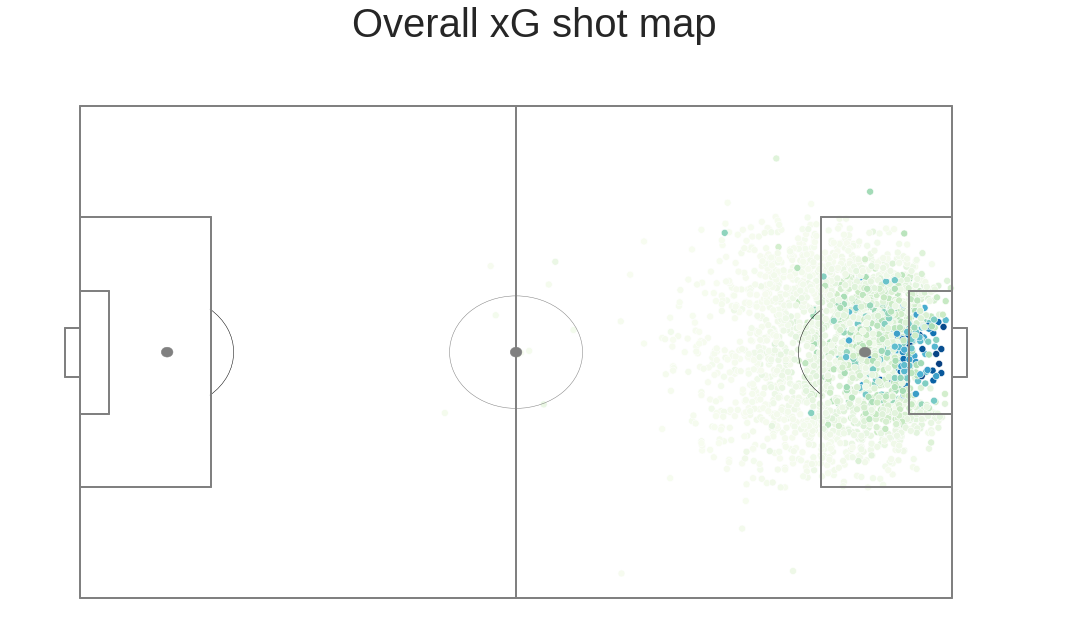

In [ ]:
plt1 = pitchplot()
plt1 = sns.scatterplot(shot_test_set_results['x location shot'],shot_test_set_results['y location shot'],c=shot_test_set_results['predicted xg'],cmap='GnBu')
plt.axis('off')
plt.title('Overall xG shot map',size=40)
plt.tight_layout()
plt.savefig('overallxGmap.png')

In [ ]:
from matplotlib.patches import Arc

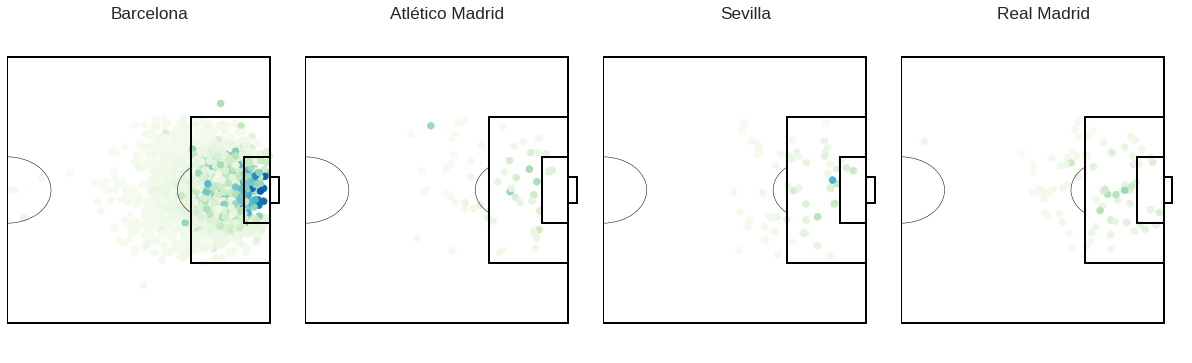

In [ ]:
i=1
fig=plt.figure(figsize=(25,10))
with plt.style.context('bmh'):
    for team in set(shot_test_set_results['Team Name'].values):
      if team=='Barcelona' or team=='Atlético Madrid' or team=='Real Madrid' or team== 'Sevilla':
        filt1 = shot_test_set_results['Team Name'] == team
        df_team = shot_test_set_results[filt1]

        ax = fig.add_subplot(2,6,i)

        ax.axis([60, 125, -10, 90])
        ax.grid(False)


        ax.plot([60, 60], [0, 80], color='black')
        ax.plot([120, 120], [0, 80], color="black")
        ax.plot([60, 120], [0, 0], color='black')
        ax.plot([60, 120], [80, 80], color='black')

        centreCircle = plt.Circle((60, 40), 10, color='black', fill=False)

        # right penalty area
        ax.plot([120, 102], [18, 18], color='black')
        ax.plot([102, 102], [18, 62], color='black')
        ax.plot([102, 120], [62, 62], color='black')

        # right six yard box
        ax.plot([120, 114], [30, 30], color='black')
        ax.plot([114, 114], [30, 50], color='black')
        ax.plot([114, 120], [50, 50], color='black')


        # right goal posts
        ax.plot([120, 122], [36, 36], color='black')
        ax.plot([120, 122], [44, 44], color='black')
        ax.plot([122, 122], [36, 44], color='black')


        # right Arc
        rightArc = Arc((108, 40), height=18.3, width=18.3, angle=0,
                       theta1=130, theta2=230, color='black')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])


        ax.scatter(df_team['x location shot'],df_team['y location shot'],c=df_team['predicted xg'],cmap='GnBu',vmin=0,vmax=1)
        ax.axis('off')

        ax.set_title(team)
        i+=1

plt.tight_layout()
plt.savefig('xg_allteams.png')

Text(1, 50, 'Statsbomb xG: 0.441')

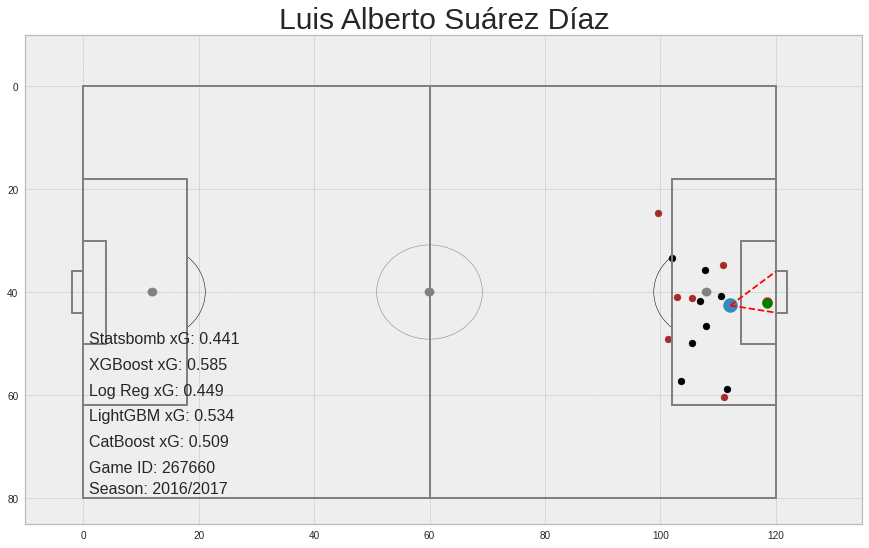

In [ ]:
ascending=False
season_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_lr = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["logreg xg"]
xg_vals_sb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["official xg"]

freeze_frame1(laliga[season_ids[70]][game_ids[70]].json_file, shot_ids[70],ax=ax)

plt.annotate("Season: {}".format(season_ids[70]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[70]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[70], 3)), xy = (1, 55), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[70], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[70], 3)), xy = (1, 65), size=16)
plt.annotate("Log Reg xG: {:.3f}".format(round(xg_vals_lr[70], 3)), xy = (1, 60), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[70], 3)), xy = (1, 50), size=16)

Text(1, 50, 'Statsbomb xG: 0.063')

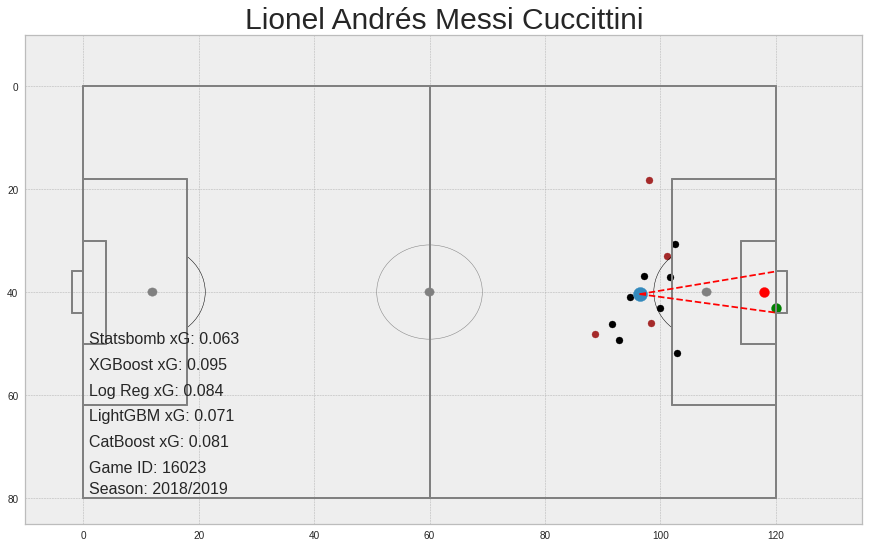

In [ ]:
ascending=False
messi_xg = shot_test_set_results[shot_test_set_results['player name']=='Lionel Andrés Messi Cuccittini']
season_ids = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_sb = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["official xg"]
xg_vals_lr = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["logreg xg"]
#messi_xg = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["player name"]=="Lionel Andrés Messi Cuccittini"
freeze_frame1(laliga[season_ids[50]][game_ids[50]].json_file, shot_ids[50],ax=ax)

plt.annotate("Season: {}".format(season_ids[50]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[50]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[50], 3)), xy = (1, 55), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[50], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[50], 3)), xy = (1, 65), size=16)
plt.annotate("Log Reg xG: {:.3f}".format(round(xg_vals_lr[50], 3)), xy = (1, 60), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[50], 3)), xy = (1, 50), size=16)

Text(1, 50, 'Statsbomb xG: 0.012')

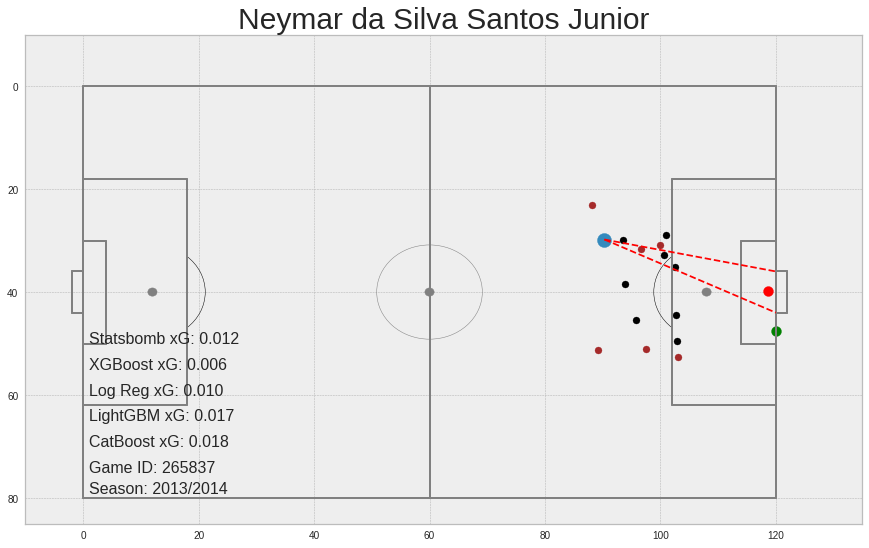

In [ ]:
ascending=True
season_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_lr = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["logreg xg"]
xg_vals_sb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["official xg"]

freeze_frame1(laliga[season_ids[55]][game_ids[55]].json_file, shot_ids[55],ax=ax)

plt.annotate("Season: {}".format(season_ids[55]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[55]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[55], 3)), xy = (1, 55), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[55], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[55], 3)), xy = (1, 65), size=16)
plt.annotate("Log Reg xG: {:.3f}".format(round(xg_vals_lr[55], 3)), xy = (1, 60), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[55], 3)), xy = (1, 50), size=16)

(50.0, 125.0, 90.0, -10.0)

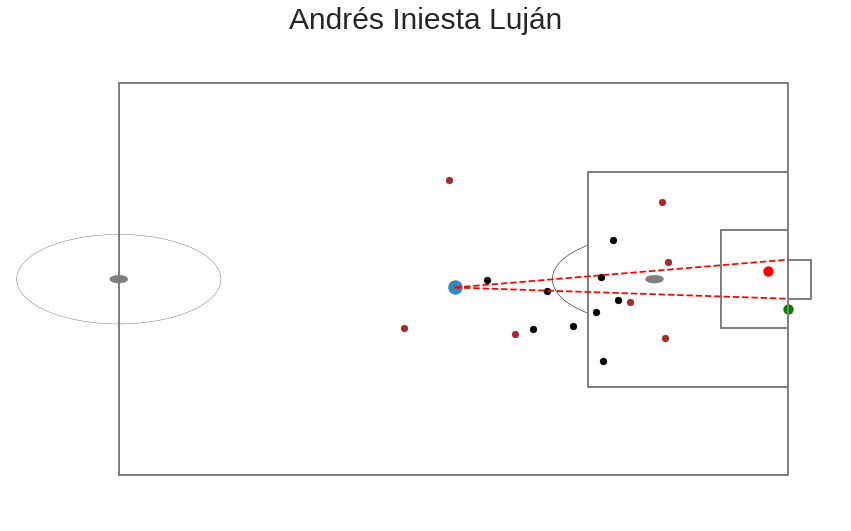

In [ ]:
ascending=True
season_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["shot id"]

freeze_frame2(laliga[season_ids[44]][game_ids[44]].json_file, shot_ids[44],ax=ax)
plt.axis('off')

Text(1, 55, 'Statsbomb xG: 0.021')

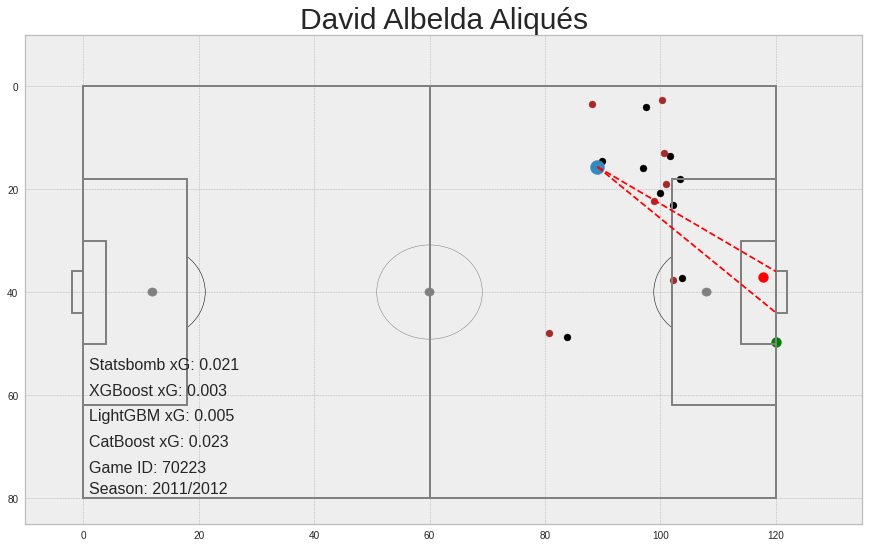

In [ ]:
ascending=False
season_ids = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_sb = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["official xg"]
outcomeval = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["outcome"]

freeze_frame1(laliga[season_ids[25]][game_ids[25]].json_file, shot_ids[25],ax=ax)

plt.annotate("Season: {}".format(season_ids[25]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[25]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[25], 3)), xy = (1, 60), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[25], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[25], 3)), xy = (1, 65), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[25], 3)), xy = (1, 55), size=16)

In [ ]:
def xGgoals(fig,df):    
    halfpitchplot()
    sns.scatterplot(data=df, x="x location shot", y="y location shot", hue="Goal_label", size = 'xgboost xg',sizes=(20, 200), palette='GnBu')
    #px.density_heatmap(df_regular_play, x="x location shot",y ="y location shot")
    playername = df["player name"][1]
    plt.title(playername,fontsize=40,pad=None,backgroundcolor='black',color='white')
    xG = sum(df['xgboost xg'])
    plt.annotate("xG: {:.3f}".format(round(xG, 3)), xy = (62, 65), size=16)
    plt.annotate("Goals: {:.1f}".format(sum(df['binary_outcome'])), xy = (62, 70), size=16)
    plt.annotate("xG per shot: {:.3f}".format(round((xG/100),3)), xy = (62, 75), size=16)
    plt.legend(loc='upper right')
    plt.axis('off')
    return plt

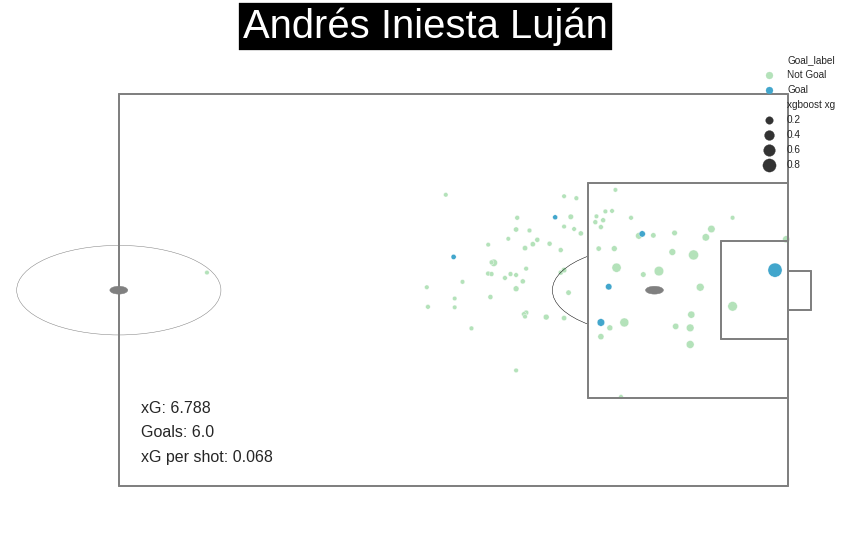

In [ ]:
iniesta_xg = shot_test_set_results[shot_test_set_results['player name']=='Andrés Iniesta Luján'].iloc[0:100]
#pitch = goals(plt,messi_xg[['x location shot','y location shot']].values,'grey','shots')
pitch = xGgoals(plt,iniesta_xg)
plt.show()

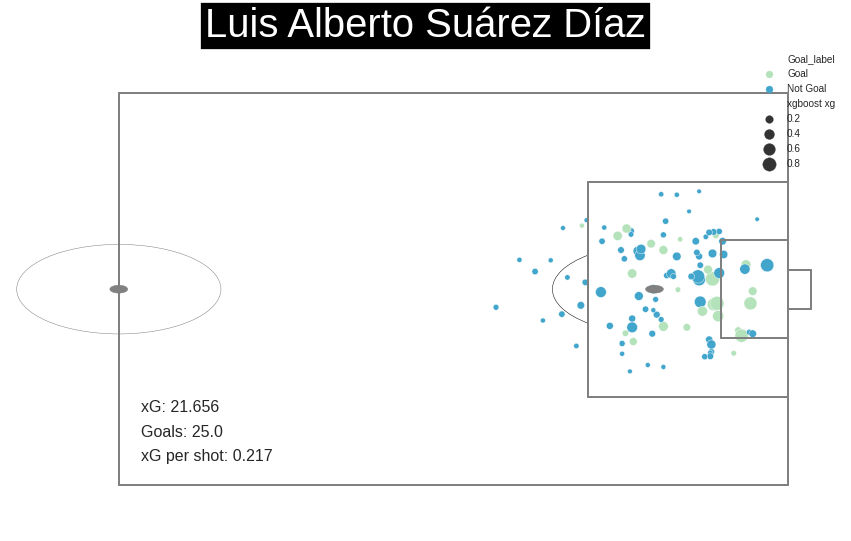

In [ ]:
suarez_xg = shot_test_set_results[shot_test_set_results['player name']=='Luis Alberto Suárez Díaz'].iloc[0:100]
#pitch = goals(plt,messi_xg[['x location shot','y location shot']].values,'grey','shots')
pitch = xGgoals(plt,suarez_xg)
plt.legend(loc='upper right')
plt.show()

In [ ]:
map = shot_test_set_results.corr()[["official xg", "lightgbm xg", "xgboost xg","catboost xg"]].loc[["official xg", "lightgbm xg", "xgboost xg","catboost xg"]]

Text(0.5, 1.0, 'Binary Probability')

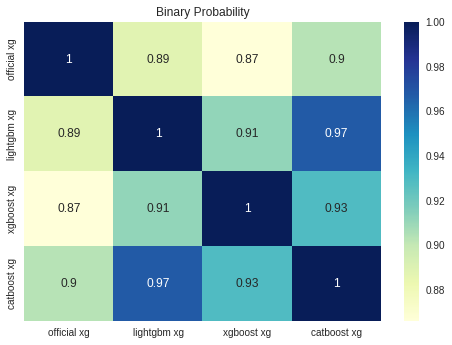

In [ ]:
sns.heatmap(map,cmap="YlGnBu",annot=True)
plt.title('Binary Probability')